In [ ]:
import pandas as pd
import numpy as np
import re
#-----------------------------------------------------------------------------------------#
import seaborn as sns
import matplotlib.pyplot as plt
import nltk.tokenize
from nltk.tokenize import word_tokenize
#-------------------------------------------------------------------------------------------#
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
import spacy
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
from nltk.stem import WordNetLemmatizer
import nltk.tokenize
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
#-------------------------------------------------------------------------------------------#
import plotly.express as px
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
# --------------------------------------------------------------------------------------------#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,confusion_matrix,recall_score
from time import time
import random
import sklearn.metrics as metrics
#-------------------------------------------------------------------------------------------------------#


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns
import sys
sys.setrecursionlimit(1500)
import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
meta = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capstone_project/meta_prime_pantry (1).csv")
prime = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capstone_project/review_prime_pantry.csv")
grocery = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capstone_project/cleaned_grocery_data.csv")

In [ ]:
meta.head()

Unnamed: 0                                        description  \
0           0  sink your sweet tooth into milk duds candya de...   
1           1  sink your sweet tooth into milk duds candya de...   
2           2  a perfect lentil soup starts with goya lentils...   
3           3  saran premium wrap is an extra tough yet easy ...   
4           4  200 sq ft  285 ft x 11 3 4 in x 18 6 m2   easy...   

                                               title      brand  price  \
0  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
1  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
2                            goya dry lentils  16 oz       Goya    NaN   
3              saran premium plastic wrap  100 sq ft      Saran    NaN   
4           saran cling plus plastic wrap  200 sq ft      Saran    NaN   

         asin  
0  B00005BPJO  
1  B00005BPJO  
2  B0000DIF38  
3  B0000DIWNI  
4  B0000DIWNZ

In [ ]:
meta = meta.iloc[:,1:]
meta

description  \
0      sink your sweet tooth into milk duds candya de...   
1      sink your sweet tooth into milk duds candya de...   
2      a perfect lentil soup starts with goya lentils...   
3      saran premium wrap is an extra tough yet easy ...   
4      200 sq ft  285 ft x 11 3 4 in x 18 6 m2   easy...   
...                                                  ...   
10424  these bars are where our journey started and i...   
10425  these bars are where our journey started and i...   
10426  these bars are where our journey started and i...   
10427  these bars are where our journey started and i...   
10428  delicious  crowd pleasing and convenient it ca...   

                                                   title      brand  price  \
0      hershey s milk duds candy  5 ounce halloween c...  Milk Duds   5.00   
1      hershey s milk duds candy  5 ounce halloween c...  Milk Duds   5.00   
2                                goya dry lentils  16 oz       Goya    NaN   
3                  saran premium plastic wrap  100 sq ft      Saran    NaN   
4               saran cling plus plastic wrap  200 sq ft      Saran    NaN   
...                                                  ...        ...    ...   
10424  kind bars  caramel almond  amp  sea salt  glut...       KIND   3.98   
10425  kind bars  maple glazed pecan  amp  sea salt  ...       KIND   5.81   
10426  kind bars  dark chocolate almond  amp  coconut...       KIND   4.98   
10427  kind bars  honey roasted nuts  amp  sea salt  ...       KIND   5.81   
10428                     tostitos salsa  mild  69 ounce   Tostitos   6.82   

             asin  
0      B00005BPJO  
1      B00005BPJO  
2      B0000DIF38  
3      B0000DIWNI  
4      B0000DIWNZ  
...           ...  
10424  B01HI76312  
10425  B01HI76790  
10426  B01HI76SA8  
10427  B01HI76XS0  
10428  B01HI8JVI8  

[10429 rows x 5 columns]

In [ ]:
meta = meta.drop_duplicates()

In [ ]:
prime.head()
prime = prime.iloc[:,1:]
prime

reviewerID  reviewTime  overall  verified        asin  \
0      A1HGHX5WY3TZI0  2017-04-19      1.0      True  B00NMPIWBY   
1      A28W28MYPUO4RI  2017-05-26      1.0      True  B00U5G2JJO   
2       AWT4I7MWL01C6  2017-08-11      2.0      True  B000VK9XYI   
3      A2AJ4Y1EOCXUVX  2018-04-04      1.0      True  B018FTW6WC   
4       A16KBQ3HERAQ3  2017-03-28      1.0      True  B017XKRYNA   
...               ...         ...      ...       ...         ...   
89995  A3NGWA4BSWPSZJ  2018-02-28      5.0     False  B00OKKMHIO   
89996  A19FWJQW5IQLG0  2018-01-25      5.0     False  B013QN8B80   
89997  A3410OMLBNV6E0  2015-02-20      5.0      True  B00W6T13OU   
89998    A6BR8ETNLA6A  2017-06-10      5.0      True  B00N954VHG   
89999  A2UIIJM9I6L5JG  2018-01-04      5.0      True  B011TTO7BI   

                                              reviewText  \
0                                                   junk   
1      i thought this would be more or at least just ...   
2      we live prunes but this package was more like ...   
3      i am a huge coconut fan and my usual brand was...   
4      delivery was fine no issues with the process t...   
...                                                  ...   
89995  wife bought these for snacks at work she liked...   
89996  this is the only cleanser i have found that ac...   
89997    you need to try these coffees they're excellent   
89998  pretty decent flavor and i got them with a dec...   
89999                                       does the job   

                                                 summary sentiment  
0                                                   junk  negative  
1          i thought this would be more or at least just  negative  
2                                            prune paste  negative  
3                                                hate it  negative  
4                                               one star  negative  
...                                                  ...       ...  
89995                           great variety and flavor  positive  
89996  everything else i've tried irritates it and ma...  positive  
89997                                  they're excellent  positive  
89998                                         five stars  positive  
89999                                         five stars  positive  

[90000 rows x 8 columns]

In [ ]:
prime = prime.drop_duplicates()

In [ ]:
df = pd.merge(meta,prime,on="asin",how="left")
df.head()

description  \
0  sink your sweet tooth into milk duds candya de...   
1  sink your sweet tooth into milk duds candya de...   
2  sink your sweet tooth into milk duds candya de...   
3  sink your sweet tooth into milk duds candya de...   
4  a perfect lentil soup starts with goya lentils...   

                                               title      brand  price  \
0  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
1  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
2  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
3  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
4                            goya dry lentils  16 oz       Goya    NaN   

         asin      reviewerID  reviewTime  overall verified  \
0  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
4  B0000DIF38             NaN         NaN      NaN      NaN   

                                          reviewText       summary sentiment  
0  these arrived in a melted blob but i was able ...         stale  negative  
1  i ordered these before and they were find the ...  disappointed  negative  
2                                    they came white   three stars   neutral  
3                                          very good    five stars  positive  
4                                                NaN           NaN       NaN

In [ ]:
len(df)

87355

In [ ]:
df.isnull().sum()/len(df)*100

description     0.000000
title           0.000000
brand           0.000000
price          22.141835
asin            0.000000
reviewerID      2.359338
reviewTime      2.359338
overall         2.359338
verified        2.359338
reviewText      2.407418
summary         2.411997
sentiment       2.359338
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()/len(df)*100

description    0.0
title          0.0
brand          0.0
price          0.0
asin           0.0
reviewerID     0.0
reviewTime     0.0
overall        0.0
verified       0.0
reviewText     0.0
summary        0.0
sentiment      0.0
dtype: float64

In [ ]:
len(df)

67261

In [ ]:
df["asin"].unique

<bound method Series.unique of 0        B00005BPJO
1        B00005BPJO
2        B00005BPJO
3        B00005BPJO
38       B00032E8XK
            ...    
87350    B01HI76SA8
87351    B01HI76XS0
87352    B01HI76XS0
87353    B01HI76XS0
87354    B01HI8JVI8
Name: asin, Length: 67261, dtype: object>

In [ ]:
asin_summary = df.groupby("asin")["summary"].unique()
asin_summary

asin
B00005BPJO       [stale, disappointed, three stars, five stars]
B00032E8XK    [this tuna of the five cans i opened all smell...
B0005XMTHE    [high fructose corn syrup not the real thing a...
B0005ZHPQ2                                              [eeeew]
B0005ZYFM4                                              [great]
                                    ...                        
B01HI76IYE    [kind bars buyer beware read the ingredients a...
B01HI76SA8    [two stars, beware out of date product, no ing...
B01HI76XS0    [one star, taste great low in sugar but cause ...
B01HI776Y0    [two stars, too bad the box was crunched upon,...
B01HI8JVI8                                              [salsa]
Name: summary, Length: 5741, dtype: object

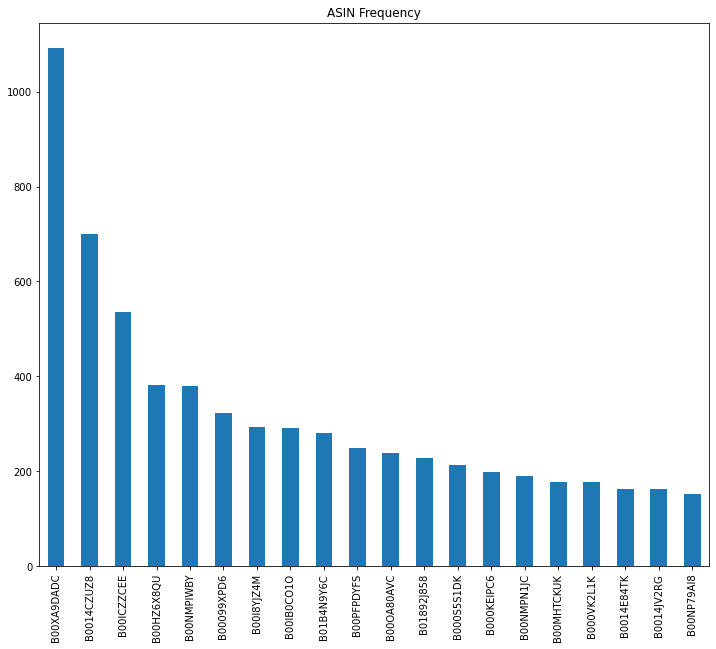

In [ ]:
plt.figure(figsize=(12,10))
df["asin"].value_counts()[:20].plot(kind="bar",title="ASIN Frequency")
plt.show()

- Based on the bar graph for ASINs, we see that certain products have significantly more reviews than other products, which may indicate a higher sale in those specific products

In [ ]:
asin_value = df["asin"].value_counts()[:20]
asin_value

B00XA9DADC    1091
B0014CZUZ8     699
B00ICZZCEE     535
B00HZ6X8QU     382
B00NMPIWBY     380
B00099XPD6     322
B00I8YJZ4M     293
B00IB0CO1O     291
B01B4N9Y6C     280
B00PFPDYFS     250
B00OA80AVC     238
B01892J858     227
B000S5S1DK     214
B000KEIPC6     199
B00NMPN1JC     189
B00MHTCKUK     178
B000VK2L1K     177
B0014E84TK     163
B0014JV2RG     163
B00NP79AI8     153
Name: asin, dtype: int64

In [ ]:
df["brand"][df["asin"] == "B00XA9DADC"]

55323    Twinings
55324    Twinings
55325    Twinings
55326    Twinings
55327    Twinings
           ...   
56411    Twinings
56412    Twinings
56413    Twinings
56414    Twinings
56415    Twinings
Name: brand, Length: 1091, dtype: object

In [ ]:
df.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   these arrived in a melted blob but i was able ...   
1   i ordered these before and they were find the ...   
2                                     they came white   
3                                           very good   
38  for some reason this tuna of the five cans i o...   

                                              summary sentiment  
0                                               stale  negative  
1                                        disappointed  negative  
2                                         three stars   neutral  
3                                          five stars  positive  
38  this tuna of the five cans i opened all smelle...  negative

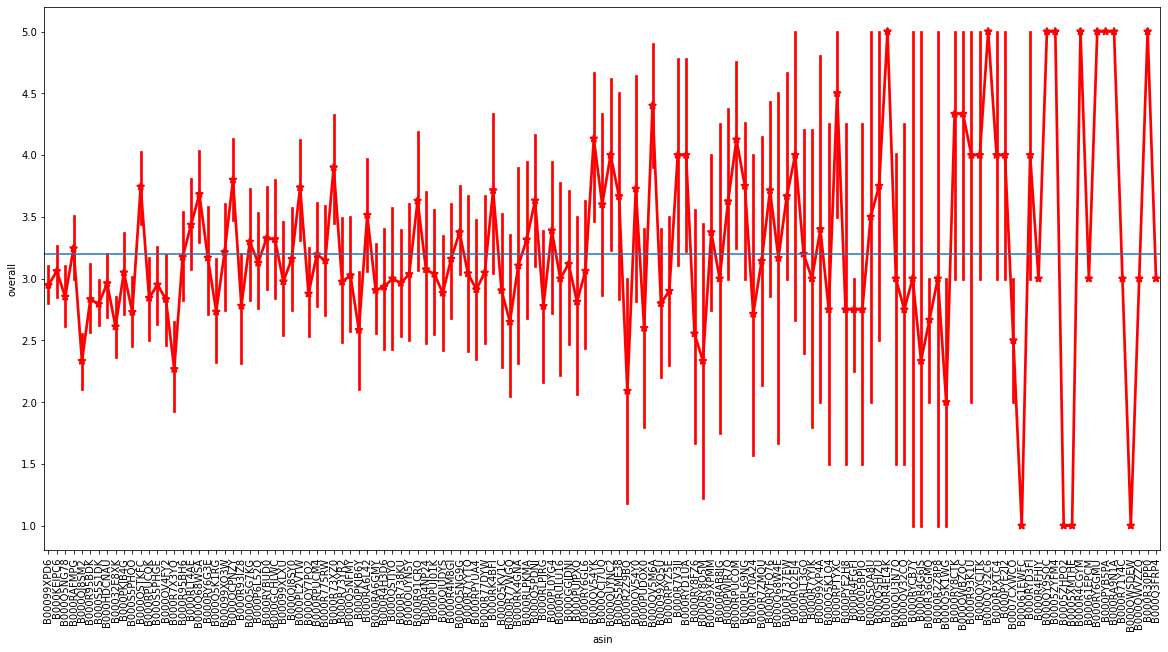

In [ ]:
plt.figure(figsize=(20,10))
asins_count_ix = df["asin"][:4000].value_counts().index
sns.pointplot(x="asin", y="overall", order=asins_count_ix, data=df, markers="*",color='r')
plt.axhline(3.2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head(3)

description  \
0  sink your sweet tooth into milk duds candya de...   
1  sink your sweet tooth into milk duds candya de...   
2  sink your sweet tooth into milk duds candya de...   

                                               title      brand  price  \
0  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
1  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
2  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   

         asin      reviewerID  reviewTime  overall verified  \
0  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   

                                          reviewText       summary sentiment  
0  these arrived in a melted blob but i was able ...         stale  negative  
1  i ordered these before and they were find the ...  disappointed  negative  
2                                    they came white   three stars   neutral

In [ ]:
df_corr = df.copy()

In [ ]:
fig = px.pie(df["overall"],df["sentiment"],hole=0.5)
fig.show()

In [ ]:
xt = df.groupby("sentiment")[["overall"]].sum()
xt

overall
sentiment          
negative    30838.0
neutral     66141.0
positive   112063.0

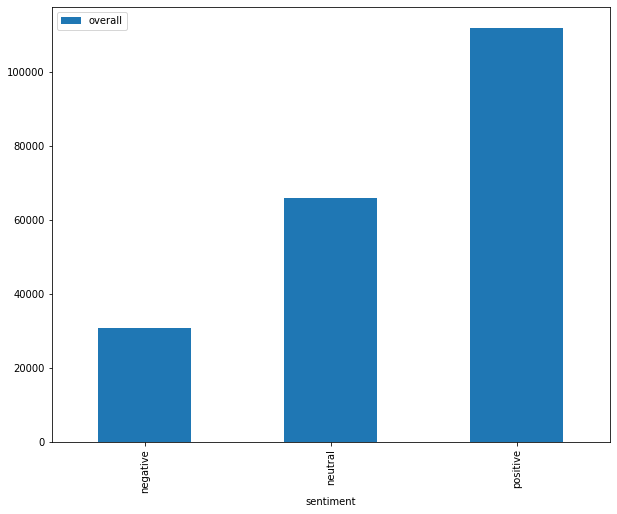

In [ ]:
xt.plot(kind="bar",figsize=(10,8))
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
df.head(3)

description  \
0  sink your sweet tooth into milk duds candya de...   
1  sink your sweet tooth into milk duds candya de...   
2  sink your sweet tooth into milk duds candya de...   

                                               title      brand  price  \
0  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
1  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
2  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   

         asin      reviewerID  reviewTime  overall verified  \
0  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   

                                          reviewText       summary sentiment  
0  these arrived in a melted blob but i was able ...         stale  negative  
1  i ordered these before and they were find the ...  disappointed  negative  
2                                    they came white   three stars   neutral

#<i> LEMMETIZATION AND STOPWORDS </i>

In [ ]:
lemmatizer = WordNetLemmatizer()
df1["reviewText"] = df1["reviewText"].apply(lambda words: ' '.join(lemmatizer.lemmatize(word,pos='v') for word in words.split()))

In [ ]:
df1["reviewText"] = df1["reviewText"].apply(lambda words:' '.join(word.lower() for word in words.split() if word not in stopwords))

In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  
0                                               stale  negative  
1                                        disappointed  negative  
2                                         three stars   neutral  
3                                          five stars  positive  
38  this tuna of the five cans i opened all smelle...  negative

In [ ]:
df2 = df.copy()

In [ ]:
df2["reviewText"] = df2["reviewText"].apply(str)
df2["reviewText"] = df2["reviewText"].apply(word_tokenize)
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df2["reviewText"]))

In [ ]:
from wordcloud import WordCloud,STOPWORDS
# wc2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(letters_only)
# plt.figure(figsize=(15,12))  
# plt.imshow(wc2,interpolation="bilinear")  # interpolation=”bilinear”: used to display smoother image.
# plt.axis("off")           # collocation argument is set to FALSE to ensure that the word cloud doesn’t contain any bigrams or duplicate words.
# plt.show()

Most of the review talk about melted,came,ordered,good,arrived

In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  
0                                               stale  negative  
1                                        disappointed  negative  
2                                         three stars   neutral  
3                                          five stars  positive  
38  this tuna of the five cans i opened all smelle...  negative

## Sentiment Analysis using TextBlob:

In [ ]:
from textblob import TextBlob

In [ ]:
text1 ="food made at the resturant was very good"
blob1 =TextBlob(text1)
blob1.sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [ ]:
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    

In [ ]:
# function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

In [ ]:
df1['Subjectivity'] = df1['reviewText'].apply(getSubjectivity) 
df1['Polarity'] = df1['reviewText'].apply(getPolarity)

In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  Subjectivity  \
0                                               stale  negative      0.523333   
1                                        disappointed  negative      0.770833   
2                                         three stars   neutral      0.000000   
3                                          five stars  positive      0.600000   
38  this tuna of the five cans i opened all smelle...  negative      0.488889   

    Polarity  
0   0.051667  
1  -0.395833  
2   0.000000  
3   0.700000  
38 -0.233333

In [ ]:
def getAnalysis(score):
  if score < 0:
    return "negative"
  elif score == 0:
    return "neutral"
  else:
    return "positive"
df1["text_blob_Analysis"] = df1["Polarity"].apply(getAnalysis)

In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  Subjectivity  \
0                                               stale  negative      0.523333   
1                                        disappointed  negative      0.770833   
2                                         three stars   neutral      0.000000   
3                                          five stars  positive      0.600000   
38  this tuna of the five cans i opened all smelle...  negative      0.488889   

    Polarity text_blob_Analysis  
0   0.051667           positive  
1  -0.395833           negative  
2   0.000000            neutral  
3   0.700000           positive  
38 -0.233333           negative

## Sentiment Analysis using VADER

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentence1 = "HI how are you"

In [ ]:
vader = analyzer.polarity_scores(sentence1)
vader

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df1['Vader Sentiment'] = df1['reviewText'].apply(vadersentimentanalysis)

In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'positive'
    elif compound <= -0.5 :
        return 'negative'
    else:
        return 'neutral'
df1['Vader Analysis'] = df1['Vader Sentiment'].apply(vader_analysis)

In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  Subjectivity  \
0                                               stale  negative      0.523333   
1                                        disappointed  negative      0.770833   
2                                         three stars   neutral      0.000000   
3                                          five stars  positive      0.600000   
38  this tuna of the five cans i opened all smelle...  negative      0.488889   

    Polarity text_blob_Analysis  Vader Sentiment Vader Analysis  
0   0.051667           positive          -0.1027        neutral  
1  -0.395833           negative           0.7579       positive  
2   0.000000            neutral           0.0000        neutral  
3   0.700000           positive           0.4404        neutral  
38 -0.233333           negative          -0.4767        neutral

In [ ]:
pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from afinn import Afinn

In [ ]:
afn = Afinn()

In [ ]:
scores = [afn.score(article) for article in df1["reviewText"]]

In [ ]:
df1["Affin_score"] = scores

In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  Subjectivity  \
0                                               stale  negative      0.523333   
1                                        disappointed  negative      0.770833   
2                                         three stars   neutral      0.000000   
3                                          five stars  positive      0.600000   
38  this tuna of the five cans i opened all smelle...  negative      0.488889   

    Polarity text_blob_Analysis  Vader Sentiment Vader Analysis  Affin_score  
0   0.051667           positive          -0.1027        neutral         -1.0  
1  -0.395833           negative           0.7579       positive          4.0  
2   0.000000            neutral           0.0000        neutral          0.0  
3   0.700000           positive           0.4404        neutral          3.0  
38 -0.233333           negative          -0.4767        neutral         -1.0

In [ ]:
def getAffin(score):
  if score > 0:
    return "positive"
  elif score < 0:
    return "negative"
  else:
    return "neutral"
df1["Affin_Analysis"] = df1["Affin_score"].apply(getAnalysis)

In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  Subjectivity  \
0                                               stale  negative      0.523333   
1                                        disappointed  negative      0.770833   
2                                         three stars   neutral      0.000000   
3                                          five stars  positive      0.600000   
38  this tuna of the five cans i opened all smelle...  negative      0.488889   

    Polarity text_blob_Analysis  Vader Sentiment Vader Analysis  Affin_score  \
0   0.051667           positive          -0.1027        neutral         -1.0   
1  -0.395833           negative           0.7579       positive          4.0   
2   0.000000            neutral           0.0000        neutral          0.0   
3   0.700000           positive           0.4404        neutral          3.0   
38 -0.233333           negative          -0.4767        neutral         -1.0   

   Affin_Analysis  
0        negative  
1        positive  
2         neutral  
3        positive  
38       negative

In [ ]:
df_new = df1.loc[:,["reviewText","sentiment","text_blob_Analysis","Vader Analysis","Affin_Analysis"]]

In [ ]:
df_new

reviewText sentiment  \
0      arrive melt blob able pull piece let box sit a...  negative   
1      order find product time hard chewy store awhil...  negative   
2                                             come white   neutral   
3                                                   good  positive   
38     reason tuna open smell like bad end feed lot c...  negative   
...                                                  ...       ...   
87350                                              yummy  positive   
87351                                          come melt  negative   
87352  like taste convenience eat cause gas chicory r...   neutral   
87353  best bar come kind low sugar good diabetics lo...  positive   
87354                          elderly neighbor love eat  positive   

      text_blob_Analysis Vader Analysis Affin_Analysis  
0               positive        neutral       negative  
1               negative       positive       positive  
2                neutral        neutral        neutral  
3               positive        neutral       positive  
38              negative        neutral       negative  
...                  ...            ...            ...  
87350            neutral       positive       positive  
87351            neutral        neutral        neutral  
87352            neutral        neutral       positive  
87353           positive       positive       positive  
87354           positive       positive       positive  

[67261 rows x 5 columns]

## CHECKING F1_SCORE ,ACCURACY OF SENTIMENTS

In [ ]:
text_blob = f1_score(df_new["sentiment"],df_new["text_blob_Analysis"],average="weighted")
Vader_analysis = f1_score(df_new["sentiment"],df_new["Vader Analysis"],average="weighted")
Affin_analysis = f1_score(df_new["sentiment"],df_new["Affin_Analysis"],average="weighted")

In [ ]:
text_blob_ac = accuracy_score(df_new["sentiment"],df_new["text_blob_Analysis"])
Vader_analysis_ac = accuracy_score(df_new["sentiment"],df_new["Vader Analysis"])
Affin_analysis_ac = accuracy_score(df_new["sentiment"],df_new["Affin_Analysis"])

In [ ]:
text_blob_re = recall_score(df_new["sentiment"],df_new["text_blob_Analysis"],average="weighted")
Vader_analysis_re = recall_score(df_new["sentiment"],df_new["Vader Analysis"],average="weighted")
Affin_analysis_re = recall_score(df_new["sentiment"],df_new["Affin_Analysis"],average="weighted")

In [ ]:
text_blob_pe = precision_score(df_new["sentiment"],df_new["text_blob_Analysis"],average="weighted")
Vader_analysis_pe = precision_score(df_new["sentiment"],df_new["Vader Analysis"],average="weighted")
Affin_analysis_pe = precision_score(df_new["sentiment"],df_new["Affin_Analysis"],average="weighted")

In [ ]:
df_compare = pd.DataFrame({"MODEL":["Text_blob","Vader_analysis","Affin_Analysis"],
                           "F1_score":[text_blob,Vader_analysis,Affin_analysis],
                           "Accuracy":[text_blob_ac,Vader_analysis_ac,Affin_analysis_ac],
                           "recall":[text_blob_re,Vader_analysis_re,Affin_analysis_re],
                           "precision":[text_blob_pe,Vader_analysis_pe,Affin_analysis_pe]})

In [ ]:
df_compare

MODEL  F1_score  Accuracy    recall  precision
0       Text_blob  0.422071  0.454543  0.454543   0.461814
1  Vader_analysis  0.422940  0.459211  0.459211   0.547035
2  Affin_Analysis  0.444613  0.474956  0.474956   0.510949

In [ ]:
df_model = df_new.loc[:,["reviewText","Affin_Analysis"]]
df_model

reviewText Affin_Analysis
0      arrive melt blob able pull piece let box sit a...       negative
1      order find product time hard chewy store awhil...       positive
2                                             come white        neutral
3                                                   good       positive
38     reason tuna open smell like bad end feed lot c...       negative
...                                                  ...            ...
87350                                              yummy       positive
87351                                          come melt        neutral
87352  like taste convenience eat cause gas chicory r...       positive
87353  best bar come kind low sugar good diabetics lo...       positive
87354                          elderly neighbor love eat       positive

[67261 rows x 2 columns]

In [ ]:
X=df_model['reviewText']               
y=df_model['Affin_Analysis']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=60)

In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

## LOGISTIC REGRESSION

In [ ]:
lr_model=Pipeline([('tfidf', TfidfVectorizer(lowercase=False)),( 'clf',LogisticRegression(solver='lbfgs'))])
lr_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [ ]:
#Visualizing Classification Report 
y_pred= lr_model.predict(x_test)
report = classification_report(y_test,y_pred, output_dict=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.80      0.85      2981
     neutral       0.87      0.86      0.86      4328
    positive       0.95      0.98      0.97     12870

    accuracy                           0.93     20179
   macro avg       0.91      0.88      0.89     20179
weighted avg       0.93      0.93      0.93     20179



In [ ]:
accuracy_score =  accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred,average='weighted')
precision_score =  precision_score(y_test, y_pred, average='weighted')

In [ ]:
y_proba = lr_model.predict_proba(x_test)
y_proba

array([[8.78602811e-01, 1.18556065e-01, 2.84112377e-03],
       [6.37652550e-02, 8.26695324e-01, 1.09539421e-01],
       [8.90582581e-08, 1.55982897e-05, 9.99984313e-01],
       ...,
       [7.74012795e-06, 8.87019734e-05, 9.99903558e-01],
       [6.77590512e-02, 1.92757105e-01, 7.39483844e-01],
       [3.83831616e-02, 8.63826963e-01, 9.77898752e-02]])

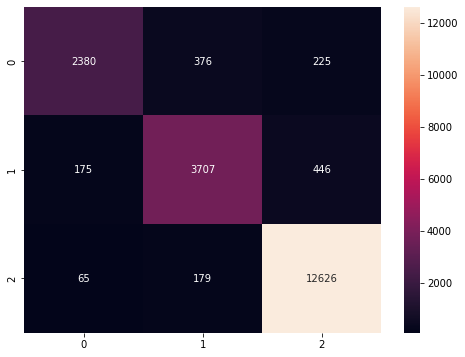

In [ ]:
con=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con,annot = True,fmt='d')
plt.show()

## RANDOMFOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
my_model=Pipeline([('tfidf', TfidfVectorizer()),('classifier',RandomForestClassifier(max_depth=100))])
#the training 
my_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(max_depth=100))])

In [ ]:
rf_pred= my_model.predict(x_test)

In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

    negative       0.97      0.44      0.60      2981
     neutral       0.94      0.41      0.57      4328
    positive       0.76      1.00      0.86     12870

    accuracy                           0.79     20179
   macro avg       0.89      0.61      0.68     20179
weighted avg       0.83      0.79      0.76     20179



In [ ]:
accuracy_score1 =  metrics.accuracy_score(y_test, rf_pred)
recall_score1 = metrics.recall_score(y_test, rf_pred, average='weighted')
f1_score1 = metrics.f1_score(y_test, rf_pred,average='weighted')
precision_score1=  metrics.precision_score(y_test, rf_pred, average='weighted')

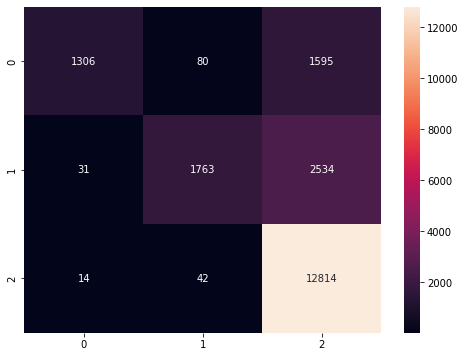

In [ ]:
con12=confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con12,annot = True,fmt='d')
plt.show()

## SVC

In [ ]:
import sklearn.metrics as metrics

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc_model=Pipeline([('tfidf', TfidfVectorizer()),('classifier',LinearSVC())])
#the training 
svc_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', LinearSVC())])

In [ ]:
svc_pred= svc_model.predict(x_test)

In [ ]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      2981
     neutral       0.91      0.86      0.88      4328
    positive       0.96      0.99      0.97     12870

    accuracy                           0.94     20179
   macro avg       0.92      0.91      0.92     20179
weighted avg       0.94      0.94      0.94     20179



In [ ]:
accuracy_score2 =  metrics.accuracy_score(y_test, svc_pred)
recall_score2 = metrics.recall_score(y_test, svc_pred, average='weighted')
f1_score2 = metrics.f1_score(y_test, svc_pred,average='weighted')
precision_score2=  metrics.precision_score(y_test, svc_pred, average='weighted')

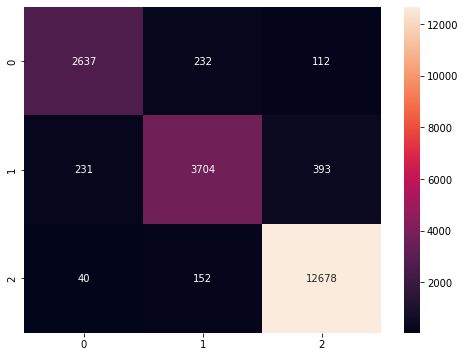

In [ ]:
con1=confusion_matrix(y_test,svc_pred)
plt.figure(figsize=(8,6))
sns.heatmap(con1,annot = True,fmt='d')
plt.show()

In [ ]:
df5 = pd.DataFrame({"MODEL":["Logistic_regression","RANDOM FOREST","SVC"],
                           "F1_score":[f1_score,f1_score1,f1_score2],
                           "Accuracy":[accuracy_score,accuracy_score1,accuracy_score2],
                           "recall":[recall_score,recall_score1,recall_score2],
                           "precision":[precision_score,precision_score1,precision_score2]})

In [ ]:
df5

MODEL  F1_score  Accuracy    recall  precision
0  Logistic_regression  0.926153  0.927350  0.927350   0.926353
1        RANDOM FOREST  0.759057  0.787105  0.787105   0.825768
2                  SVC  0.941821  0.942514  0.942514   0.941654

# Near Miss

In [ ]:
df_model.head()

reviewText Affin_Analysis
0   arrive melt blob able pull piece let box sit a...       negative
1   order find product time hard chewy store awhil...       positive
2                                          come white        neutral
3                                                good       positive
38  reason tuna open smell like bad end feed lot c...       negative

In [ ]:
X1=df_model['reviewText']
y1=df_model['Affin_Analysis']

In [ ]:
vectorizer=TfidfVectorizer(sublinear_tf=True,max_df=0.5,min_df=1,use_idf=True,smooth_idf=True)
X1=vectorizer.fit_transform(X1)

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X,y=nr.fit_resample(X1,y1)
#splitting the data into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=85)

LOGISTIC_REGRESSION

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

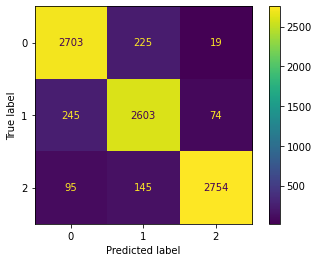

              precision    recall  f1-score   support

    negative       0.89      0.92      0.90      2947
     neutral       0.88      0.89      0.88      2922
    positive       0.97      0.92      0.94      2994

    accuracy                           0.91      8863
   macro avg       0.91      0.91      0.91      8863
weighted avg       0.91      0.91      0.91      8863

accuracy: 0.9093986234909173
recall: 0.9093986234909173
f1-score: 0.9097901290796234
precision: 0.9107831980556121


In [ ]:
lr=LogisticRegression()
clf=lr.fit(X_train,y_train)
y_pred1=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred1))
print('accuracy:', metrics.accuracy_score(y_test, y_pred1))
print('recall:', metrics.recall_score(y_test, y_pred1, average='weighted'))
print('f1-score:', metrics.f1_score(y_test, y_pred1,average='weighted'))
print('precision:', metrics.precision_score(y_test, y_pred1, average='weighted'))


In [ ]:
accuracy_score_lr =  metrics.accuracy_score(y_test, y_pred1)
recall_score_lr = metrics.recall_score(y_test, y_pred1, average='weighted')
f1_score_lr = metrics.f1_score(y_test, y_pred1,average='weighted')
precision_score_lr =  metrics.precision_score(y_test, y_pred1, average='weighted')

## RANDOMFOREST

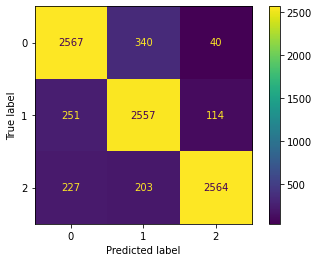

              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      2947
     neutral       0.82      0.88      0.85      2922
    positive       0.94      0.86      0.90      2994

    accuracy                           0.87      8863
   macro avg       0.87      0.87      0.87      8863
weighted avg       0.87      0.87      0.87      8863

accuracy: 0.867426379329798
recall: 0.867426379329798
f1-score: 0.8681401978354365
precision: 0.8709155645524623


In [ ]:
xgb=RandomForestClassifier(max_depth=100)
clf1=xgb.fit(X_train,y_train)
y_pred2=clf1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred2)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()
plt.show()
print(classification_report(y_test,y_pred2))
print('accuracy:', metrics.accuracy_score(y_test, y_pred2))
print('recall:', metrics.recall_score(y_test, y_pred2, average='weighted'))
print('f1-score:', metrics.f1_score(y_test, y_pred2,average='weighted'))
print('precision:', metrics.precision_score(y_test, y_pred2, average='weighted'))


In [ ]:
accuracy_score_xg =  metrics.accuracy_score(y_test, y_pred2)
recall_score_xg = metrics.recall_score(y_test, y_pred2, average='weighted')
f1_score_xg = metrics.f1_score(y_test, y_pred2,average='weighted')
precision_score_xg=  metrics.precision_score(y_test, y_pred2, average='weighted')

## SVC

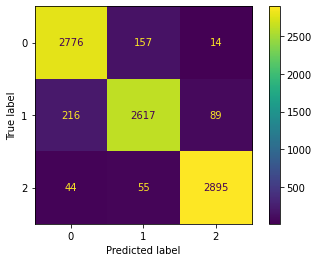

              precision    recall  f1-score   support

    negative       0.91      0.94      0.93      2947
     neutral       0.93      0.90      0.91      2922
    positive       0.97      0.97      0.97      2994

    accuracy                           0.94      8863
   macro avg       0.94      0.93      0.93      8863
weighted avg       0.94      0.94      0.94      8863

accuracy: 0.9351235473316033
recall: 0.9351235473316033
f1-score: 0.9350211959561654
precision: 0.9352126874364134


In [ ]:
svc=LinearSVC()
clf3=svc.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred3)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()
print(classification_report(y_test,y_pred3))
print('accuracy:', metrics.accuracy_score(y_test, y_pred3))
print('recall:', metrics.recall_score(y_test, y_pred3, average='weighted'))
print('f1-score:', metrics.f1_score(y_test, y_pred3,average='weighted'))
print('precision:', metrics.precision_score(y_test, y_pred3, average='weighted'))

In [ ]:
accuracy_score_svc =  metrics.accuracy_score(y_test, y_pred3)
recall_score_svc = metrics.recall_score(y_test, y_pred3, average='weighted')
f1_score_svc = metrics.f1_score(y_test, y_pred3,average='weighted')
precision_score_svc=  metrics.precision_score(y_test, y_pred3, average='weighted')

In [ ]:
df6 = pd.DataFrame({"MODEL":["Logistic_regression_nearmiss","XGBOOST_nearmiss","SVC_nearmiss"],
                           "F1_score":[f1_score_lr,f1_score_xg,f1_score_svc],
                           "Accuracy":[accuracy_score_lr,accuracy_score_xg,accuracy_score_svc],
                           "recall":[recall_score_lr,recall_score_xg,recall_score_svc],
                           "precision":[precision_score_lr,precision_score_xg,precision_score_svc]})

In [ ]:
df6

MODEL  F1_score  Accuracy    recall  precision
0  Logistic_regression_nearmiss  0.909790  0.909399  0.909399   0.910783
1              XGBOOST_nearmiss  0.868140  0.867426  0.867426   0.870916
2                  SVC_nearmiss  0.935021  0.935124  0.935124   0.935213

In [ ]:
df5

MODEL  F1_score  Accuracy    recall  precision
0  Logistic_regression  0.926153  0.927350  0.927350   0.926353
1        RANDOM FOREST  0.759057  0.787105  0.787105   0.825768
2                  SVC  0.941821  0.942514  0.942514   0.941654

## PREDICTING FUTURE SENTIMENTS

In [ ]:
df.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   these arrived in a melted blob but i was able ...   
1   i ordered these before and they were find the ...   
2                                     they came white   
3                                           very good   
38  for some reason this tuna of the five cans i o...   

                                              summary sentiment  
0                                               stale  negative  
1                                        disappointed  negative  
2                                         three stars   neutral  
3                                          five stars  positive  
38  this tuna of the five cans i opened all smelle...  negative

In [ ]:
x=vectorizer.transform(df["reviewText"])

In [ ]:
df_model["Future_prediction"] = clf.predict(x)

In [ ]:
df["Future_prediction"] = clf.predict(x)

In [ ]:
df_model

reviewText Affin_Analysis  \
0      arrive melt blob able pull piece let box sit a...       negative   
1      order find product time hard chewy store awhil...       positive   
2                                             come white        neutral   
3                                                   good       positive   
38     reason tuna open smell like bad end feed lot c...       negative   
...                                                  ...            ...   
87350                                              yummy       positive   
87351                                          come melt        neutral   
87352  like taste convenience eat cause gas chicory r...       positive   
87353  best bar come kind low sugar good diabetics lo...       positive   
87354                          elderly neighbor love eat       positive   

      Future_prediction  
0               neutral  
1              negative  
2               neutral  
3              positive  
38              neutral  
...                 ...  
87350          positive  
87351           neutral  
87352           neutral  
87353          positive  
87354           neutral  

[67261 rows x 3 columns]

In [ ]:
print('accuracy:', metrics.accuracy_score(df_model["Affin_Analysis"], df_model["Future_prediction"]))
print('recall:', metrics.recall_score(df_model["Affin_Analysis"], df_model["Future_prediction"], average='weighted'))
print('f1-score:', metrics.f1_score(df_model["Affin_Analysis"], df_model["Future_prediction"],average='weighted'))
print('precision:', metrics.precision_score(df_model["Affin_Analysis"], df_model["Future_prediction"], average='weighted'))


accuracy: 0.5752664991599887
recall: 0.5752664991599887
f1-score: 0.5966678562324339
precision: 0.8087863214481893


In [ ]:
df1.head()

description  \
0   sink your sweet tooth into milk duds candya de...   
1   sink your sweet tooth into milk duds candya de...   
2   sink your sweet tooth into milk duds candya de...   
3   sink your sweet tooth into milk duds candya de...   
38  chicken of the sea solid white albacore tuna i...   

                                                title               brand  \
0   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
1   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
2   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
3   hershey s milk duds candy  5 ounce halloween c...           Milk Duds   
38  chicken of the sea  solid white albacore tuna ...  Chicken of the Sea   

    price        asin      reviewerID  reviewTime  overall verified  \
0    5.00  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1    5.00  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   
2    5.00  B00005BPJO  A3C4FVGQ0FSORL  2016-03-23      3.0     True   
3    5.00  B00005BPJO  A1CSVASI7B3RTX  2015-05-30      5.0     True   
38   1.48  B00032E8XK  A3SFQU4UMBD80A  2015-01-23      2.0     True   

                                           reviewText  \
0   arrive melt blob able pull piece let box sit a...   
1   order find product time hard chewy store awhil...   
2                                          come white   
3                                                good   
38  reason tuna open smell like bad end feed lot c...   

                                              summary sentiment  Subjectivity  \
0                                               stale  negative      0.523333   
1                                        disappointed  negative      0.770833   
2                                         three stars   neutral      0.000000   
3                                          five stars  positive      0.600000   
38  this tuna of the five cans i opened all smelle...  negative      0.488889   

    Polarity text_blob_Analysis  Vader Sentiment Vader Analysis  Affin_score  \
0   0.051667           positive          -0.1027        neutral         -1.0   
1  -0.395833           negative           0.7579       positive          4.0   
2   0.000000            neutral           0.0000        neutral          0.0   
3   0.700000           positive           0.4404        neutral          3.0   
38 -0.233333           negative          -0.4767        neutral         -1.0   

   Affin_Analysis  
0        negative  
1        positive  
2         neutral  
3        positive  
38       negative

## TIME SERIES ANALYSIS

In [ ]:
df_ts = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/capstone_project/time_seriers_blob.csv",parse_dates=True,index_col=["reviewTime"])

In [ ]:
df_ts.head()

Unnamed: 0                                        description  \
reviewTime                                                                  
2013-05-16           0  sink your sweet tooth into milk duds candya de...   
2013-04-12           1  sink your sweet tooth into milk duds candya de...   
2016-03-23           2  sink your sweet tooth into milk duds candya de...   
2015-05-30           3  sink your sweet tooth into milk duds candya de...   
2015-01-23          38  chicken of the sea solid white albacore tuna i...   

                                                        title  \
reviewTime                                                      
2013-05-16  hershey s milk duds candy  5 ounce halloween c...   
2013-04-12  hershey s milk duds candy  5 ounce halloween c...   
2016-03-23  hershey s milk duds candy  5 ounce halloween c...   
2015-05-30  hershey s milk duds candy  5 ounce halloween c...   
2015-01-23  chicken of the sea  solid white albacore tuna ...   

                         brand  price        asin      reviewerID  overall  \
reviewTime                                                                   
2013-05-16           Milk Duds   5.00  B00005BPJO   AOOCITHIUR335      2.0   
2013-04-12           Milk Duds   5.00  B00005BPJO  A15MAURFOD3VNU      1.0   
2016-03-23           Milk Duds   5.00  B00005BPJO  A3C4FVGQ0FSORL      3.0   
2015-05-30           Milk Duds   5.00  B00005BPJO  A1CSVASI7B3RTX      5.0   
2015-01-23  Chicken of the Sea   1.48  B00032E8XK  A3SFQU4UMBD80A      2.0   

            verified                                         reviewText  \
reviewTime                                                                
2013-05-16      True  arrive melt blob able pull piece let box sit a...   
2013-04-12      True  order find product time hard chewy store awhil...   
2016-03-23      True                                         come white   
2015-05-30      True                                               good   
2015-01-23      True  reason tuna open smell like bad end feed lot c...   

                                                      summary sentiment  \
reviewTime                                                                
2013-05-16                                              stale  negative   
2013-04-12                                       disappointed  negative   
2016-03-23                                        three stars   neutral   
2015-05-30                                         five stars  positive   
2015-01-23  this tuna of the five cans i opened all smelle...  negative   

            Subjectivity  Polarity text_blob_Analysis  Vader Sentiment  \
reviewTime                                                               
2013-05-16      0.523333  0.051667           positive          -0.1027   
2013-04-12      0.770833 -0.395833           negative           0.7579   
2016-03-23      0.000000  0.000000            neutral           0.0000   
2015-05-30      0.600000  0.700000           positive           0.4404   
2015-01-23      0.488889 -0.233333           negative          -0.4767   

           Vader Analysis  Affin_score Affin_Analysis  
reviewTime                                             
2013-05-16        neutral         -1.0       negative  
2013-04-12       positive          4.0       positive  
2016-03-23        neutral          0.0        neutral  
2015-05-30        neutral          3.0       positive  
2015-01-23        neutral         -1.0       negative

In [ ]:
values=df_ts['brand'].value_counts()
values

Planters                     1614
Quaker                       1394
Twinings                     1301
Tom's of Maine                863
Method                        786
                             ... 
Campbell's Skillet Sauces       1
Topo Chico                      1
Beech-Nut                       1
Geisha                          1
Acure                           1
Name: brand, Length: 1219, dtype: int64

In [ ]:
a=values[0:3]
b=a.index
print(b)     

new_data=(df_ts[df_ts.brand.isin(b) == True])
print(new_data.shape)

Index(['Planters', 'Quaker', 'Twinings'], dtype='object')
(4309, 19)


In [ ]:
df_ts["brand"][df_ts["asin"] == "B00XA9DADC"]

reviewTime
2016-04-11    Twinings
2013-11-27    Twinings
2015-11-24    Twinings
2014-03-07    Twinings
2013-05-29    Twinings
                ...   
2018-02-08    Twinings
2014-10-08    Twinings
2014-10-18    Twinings
2015-02-18    Twinings
2016-05-20    Twinings
Name: brand, Length: 1091, dtype: object

In [ ]:
df3 = df_ts[df_ts["asin"]=="B00XA9DADC"].loc[:,["Polarity"]]
df3

Polarity
reviewTime          
2016-04-11  0.025000
2013-11-27 -0.247222
2015-11-24  0.300000
2014-03-07 -0.213889
2013-05-29  0.500000
...              ...
2018-02-08  0.650000
2014-10-08  0.800000
2014-10-18  0.700000
2015-02-18  0.650000
2016-05-20  0.500000

[1091 rows x 1 columns]

In [ ]:
df3.isnull().sum()

Polarity    0
dtype: int64

In [ ]:
# df2['date']=pd.to_datetime(df2['reviewTime'])
# df2.drop('reviewTime',axis=1,inplace=True)
# df2.info()

In [ ]:
df3.head(3)

Polarity
reviewTime          
2016-04-11  0.025000
2013-11-27 -0.247222
2015-11-24  0.300000

In [ ]:
# df2.set_index('date',inplace=True)
df3.sort_index(inplace=True)
df3

Polarity
reviewTime          
2011-04-13      0.70
2011-04-22      0.25
2011-08-23      0.50
2011-12-08     -0.10
2012-01-12      0.20
...              ...
2018-07-29      0.00
2018-08-01      0.00
2018-08-05      0.50
2018-08-11      0.30
2018-08-11      0.12

[1091 rows x 1 columns]

In [ ]:
df3=df3.resample('M').mean()
df3.dropna(inplace=True)
print(df3)

            Polarity
reviewTime          
2011-04-30  0.475000
2011-08-31  0.500000
2011-12-31 -0.100000
2012-01-31  0.200000
2012-03-31  0.441026
...              ...
2018-04-30  0.250000
2018-05-31  0.391667
2018-06-30  0.260227
2018-07-31  0.167361
2018-08-31  0.230000

[81 rows x 1 columns]


In [ ]:
print(df3)

            Polarity
reviewTime          
2011-04-30  0.475000
2011-08-31  0.500000
2011-12-31 -0.100000
2012-01-31  0.200000
2012-03-31  0.441026
...              ...
2018-04-30  0.250000
2018-05-31  0.391667
2018-06-30  0.260227
2018-07-31  0.167361
2018-08-31  0.230000

[81 rows x 1 columns]


In [ ]:
train_decompose = seasonal_decompose(df3,period=12)
d_trend = train_decompose.trend
d_seasonal = train_decompose.seasonal
d_residual = train_decompose.resid

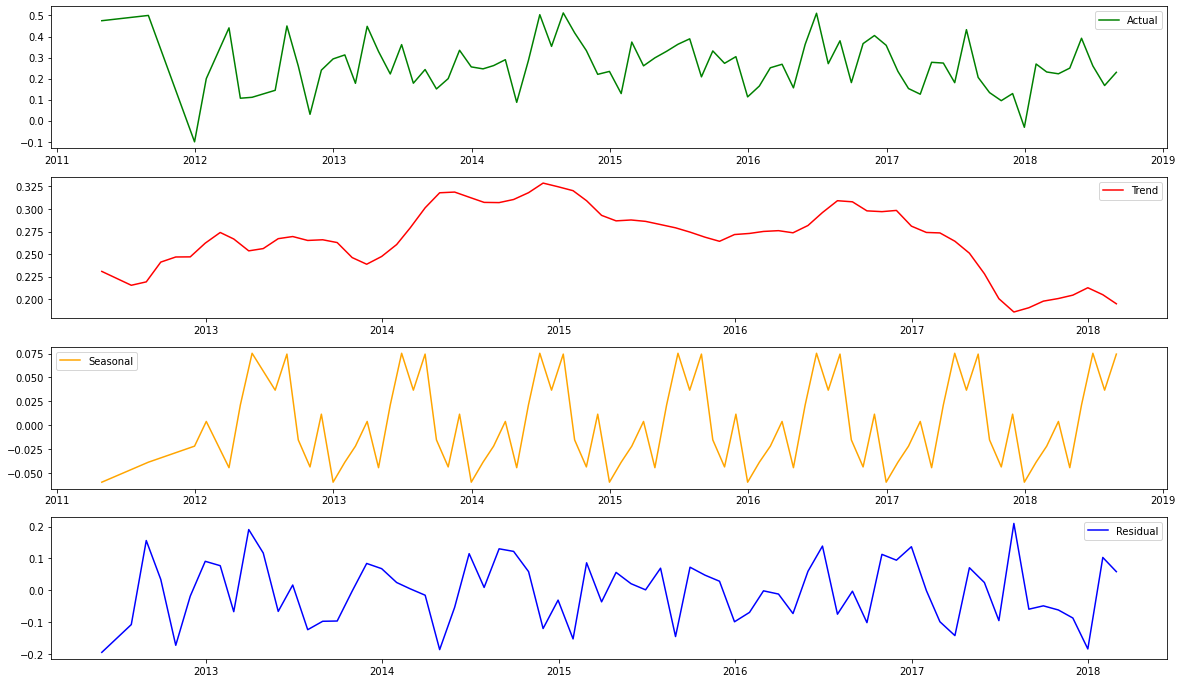

In [ ]:
fig,ax=plt.subplots(4,1,figsize=(20,12))
have = ['Actual','Trend','Seasonal','Residual']
colors=["green","red","orange","blue"]
cols = [df3,d_trend,d_seasonal,d_residual]

for k,(i,j) in enumerate(zip(cols,ax.flatten())):
  j.plot(i,label=have[k],color=colors[k])
  j.legend()

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

In [ ]:
def stationary(value):
  roll_mean = value.rolling(window=30).mean()
  roll_std = value.rolling(window=30).std()
  #---- plotting-----
  plt.figure(figsize=(12,8))
  orig = plt.plot(value, color='blue',label='Original')
  mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
  std = plt.plot(roll_std, color='black', label = 'Rolling Std')
  plt.legend()
  plt.show()

  #--- adfuller test 
  dftest = adfuller(value)[1]
  dftest1 = adfuller(value)[3]
  print("Number of lags : ",dftest1)

  if dftest<0.05:
    msg = f"Data is Stationry {dftest}"
  else:
    msg=f"Data is not Stationary"

  return msg

<Figure size 432x288 with 0 Axes>

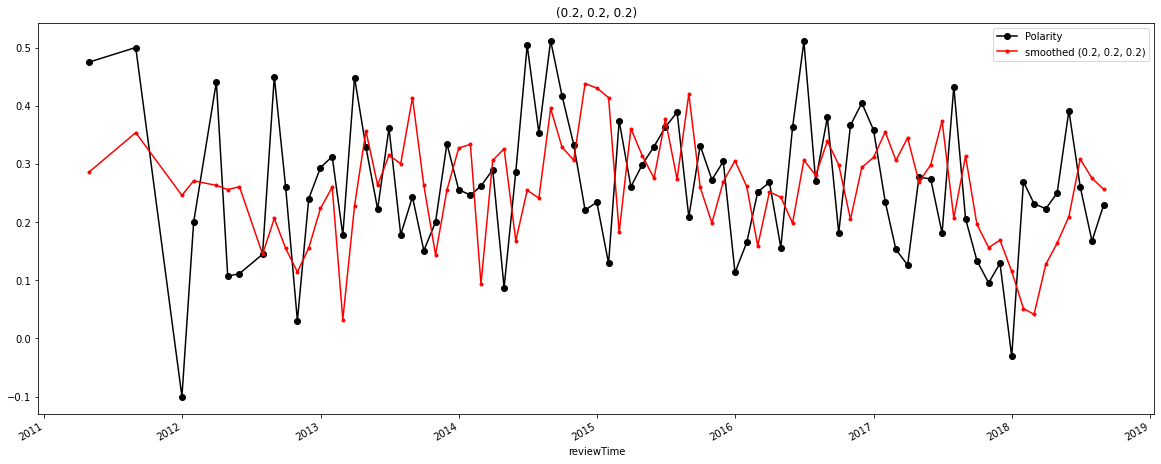

<Figure size 432x288 with 0 Axes>

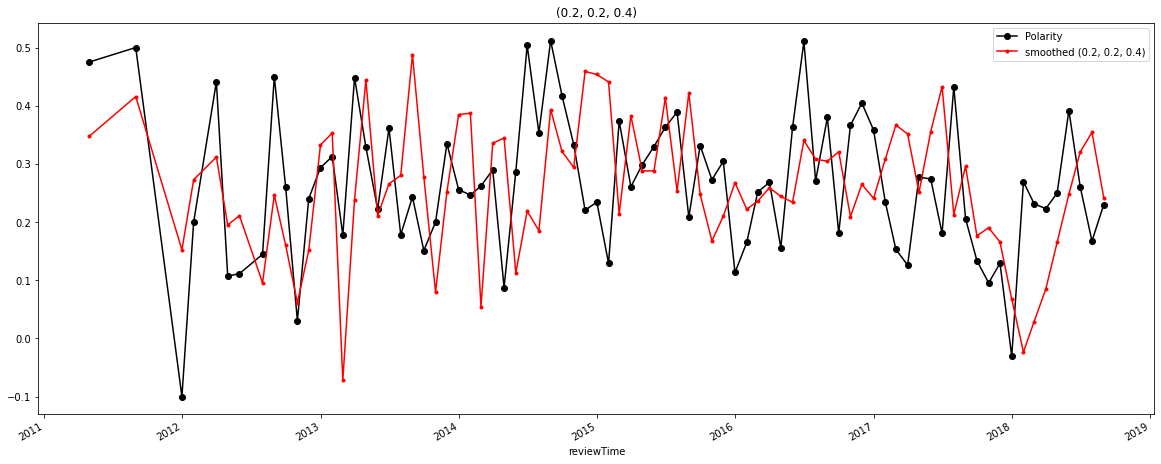

<Figure size 432x288 with 0 Axes>

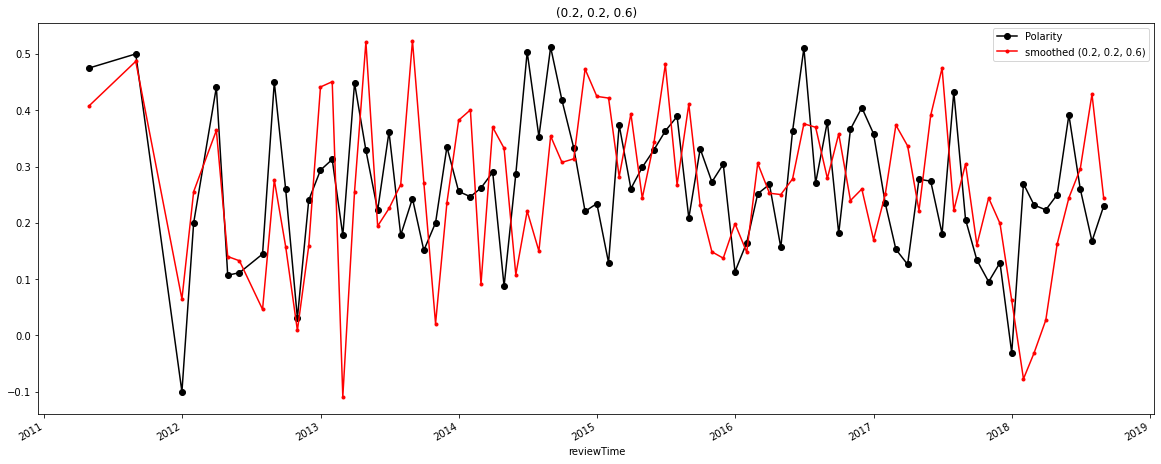

<Figure size 432x288 with 0 Axes>

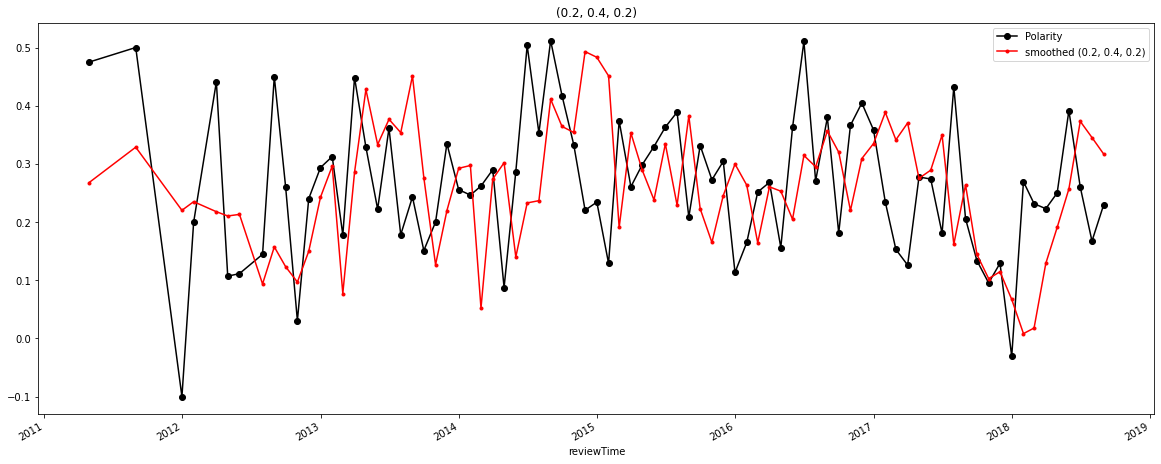

<Figure size 432x288 with 0 Axes>

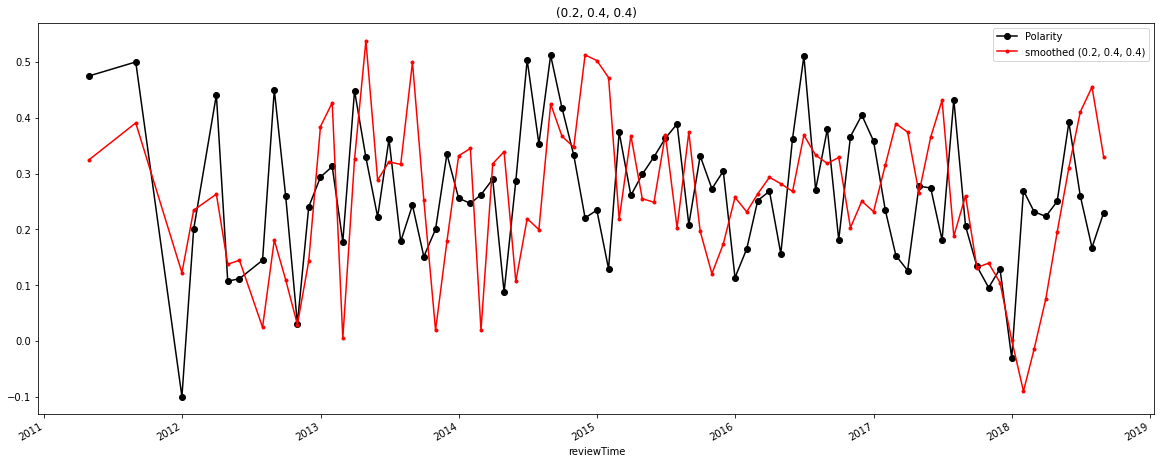

<Figure size 432x288 with 0 Axes>

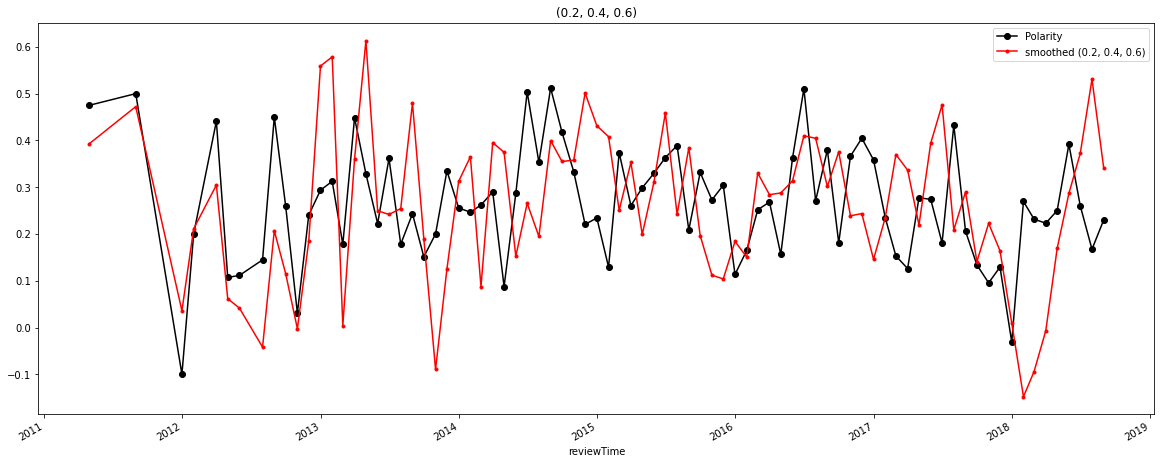

<Figure size 432x288 with 0 Axes>

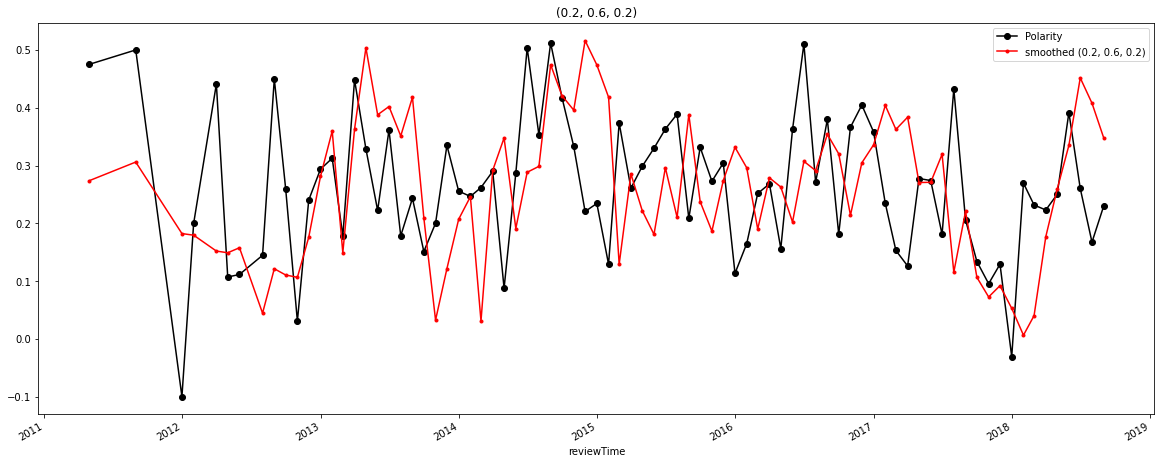

<Figure size 432x288 with 0 Axes>

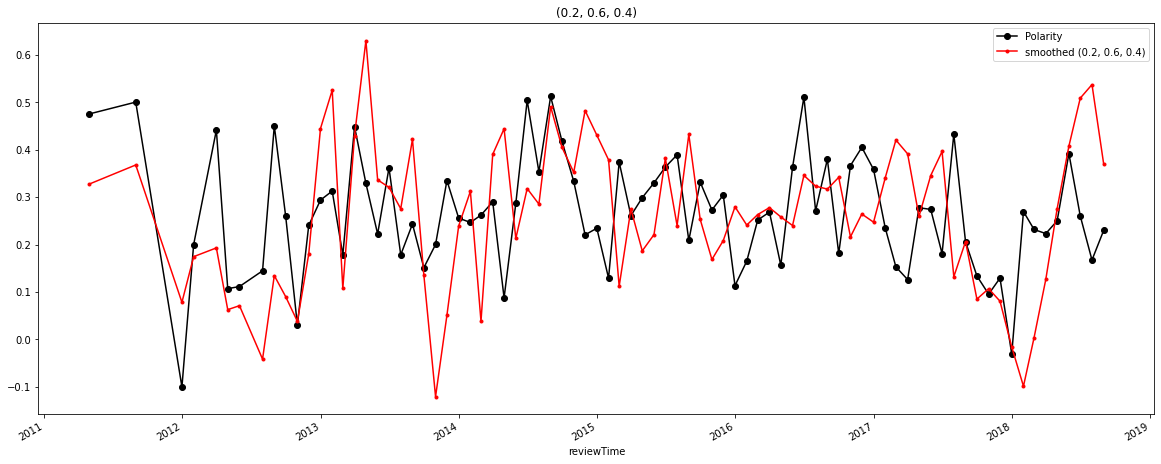

<Figure size 432x288 with 0 Axes>

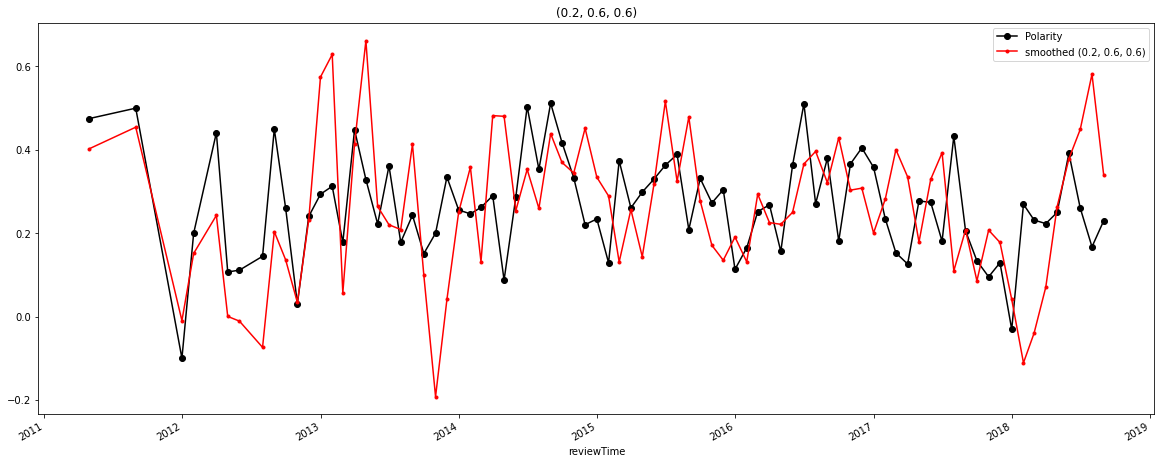

<Figure size 432x288 with 0 Axes>

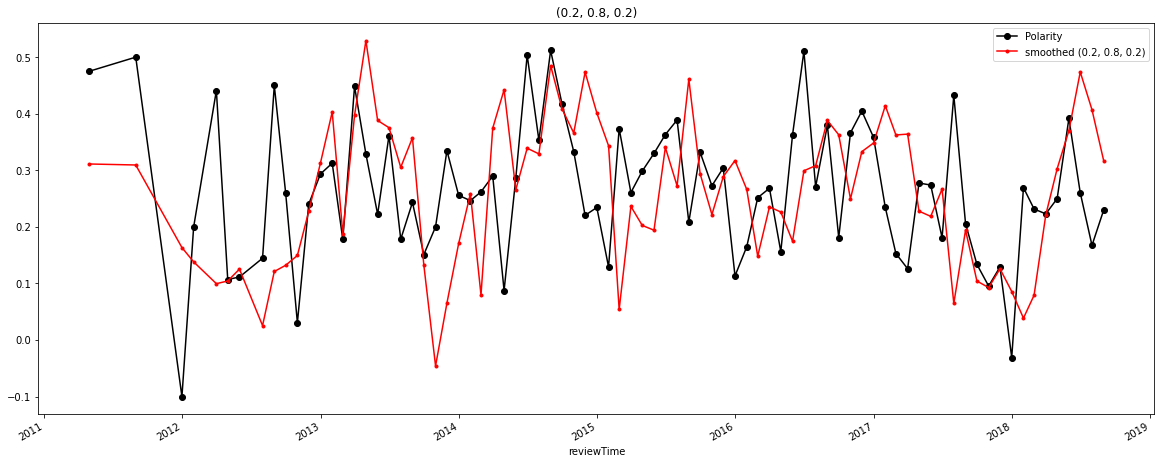

<Figure size 432x288 with 0 Axes>

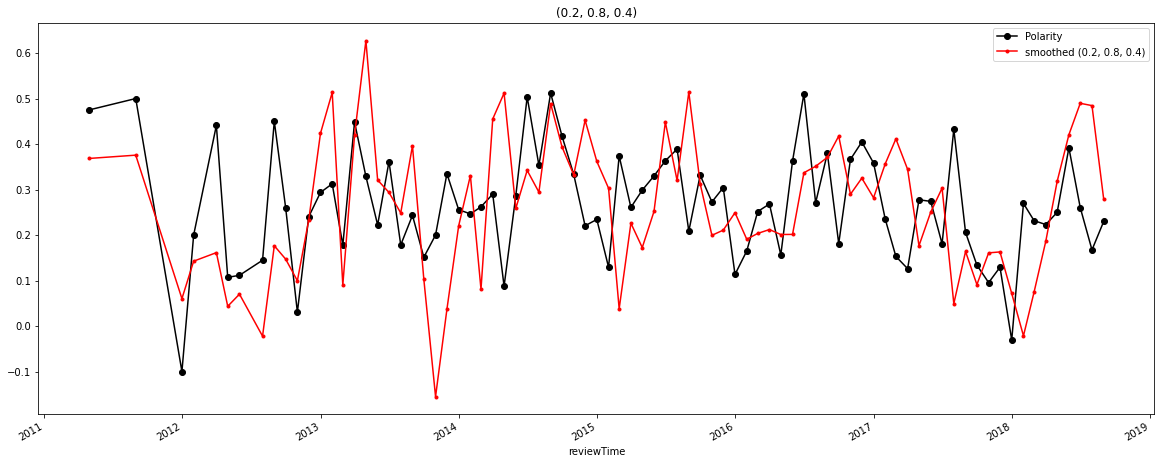

<Figure size 432x288 with 0 Axes>

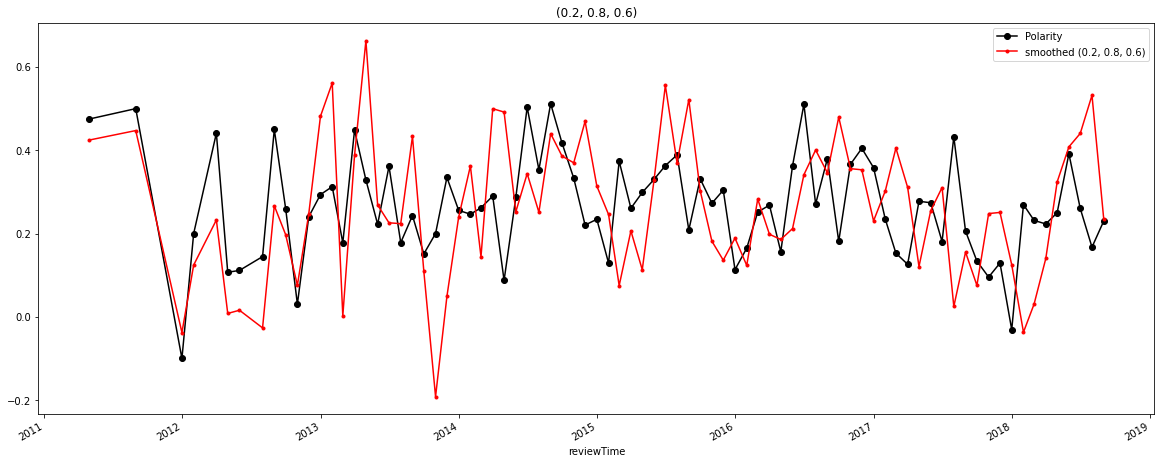

<Figure size 432x288 with 0 Axes>

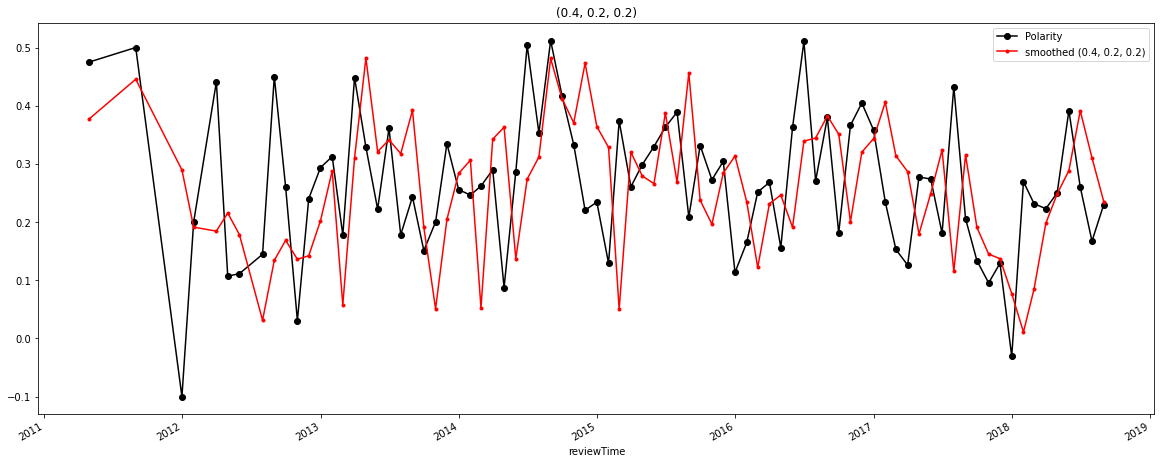

<Figure size 432x288 with 0 Axes>

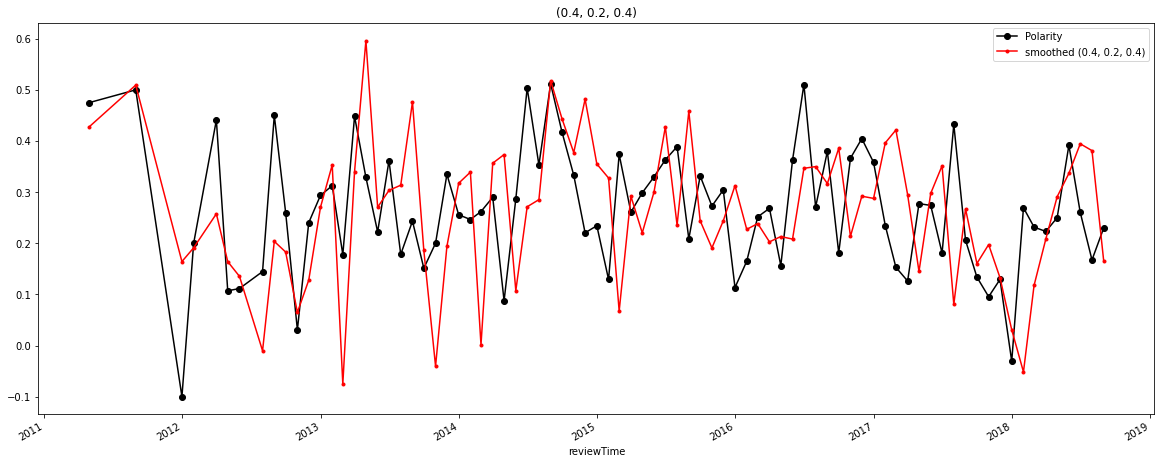

<Figure size 432x288 with 0 Axes>

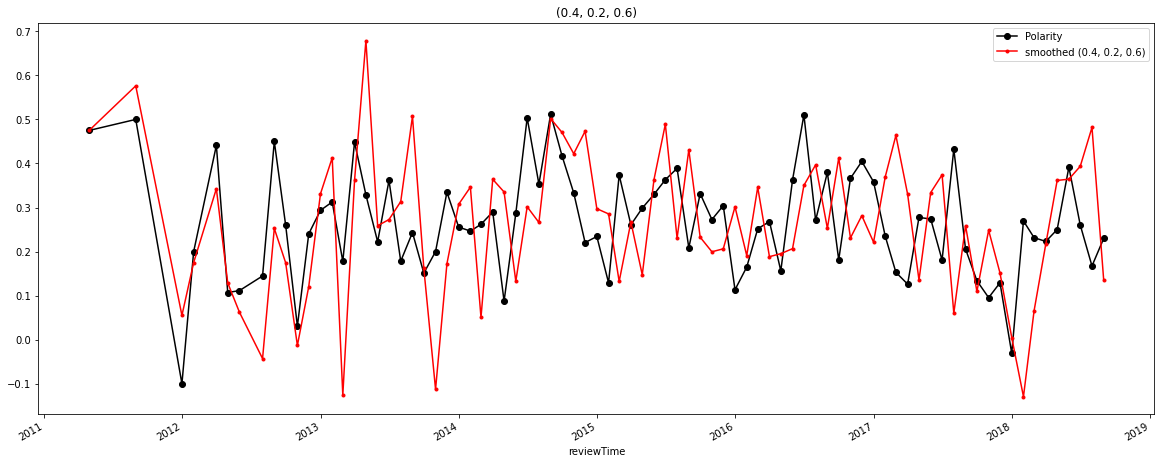

<Figure size 432x288 with 0 Axes>

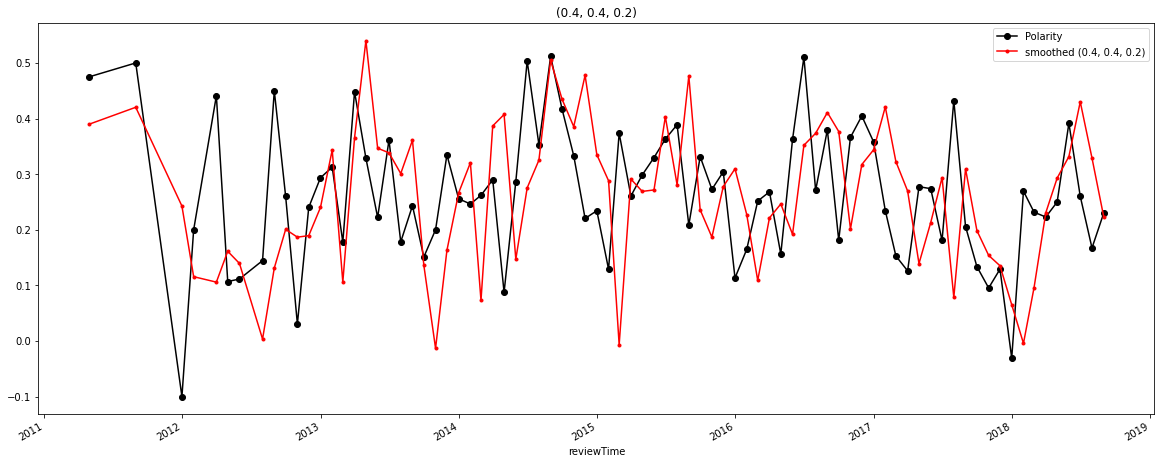

<Figure size 432x288 with 0 Axes>

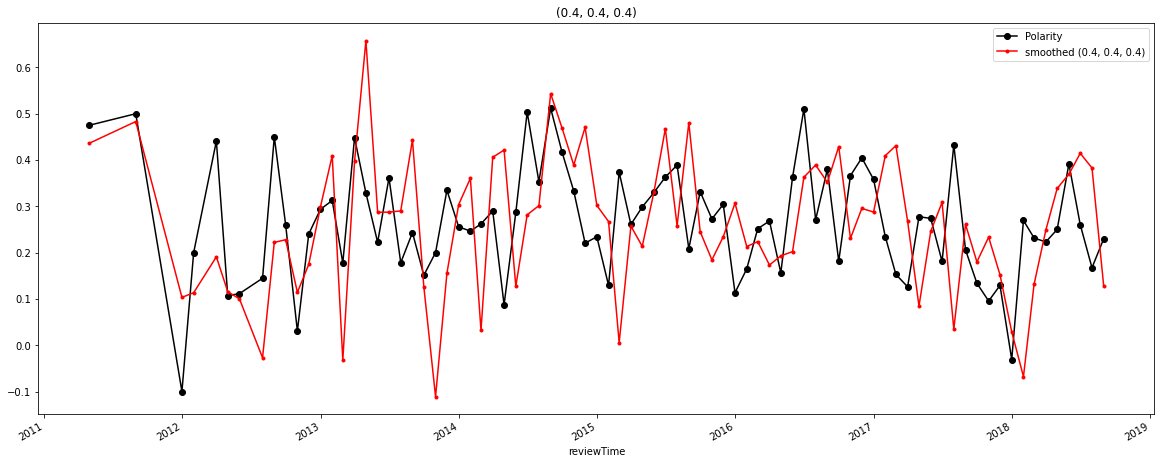

<Figure size 432x288 with 0 Axes>

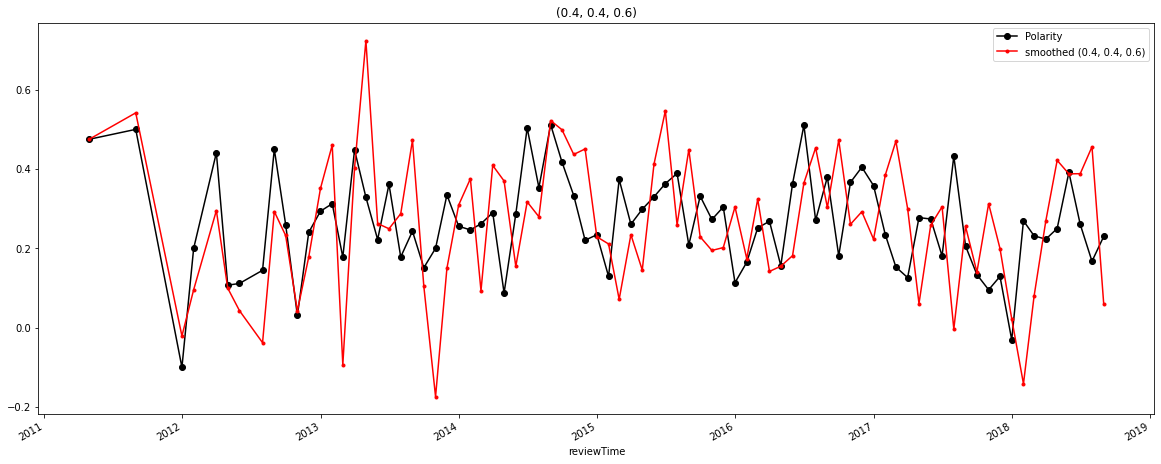

<Figure size 432x288 with 0 Axes>

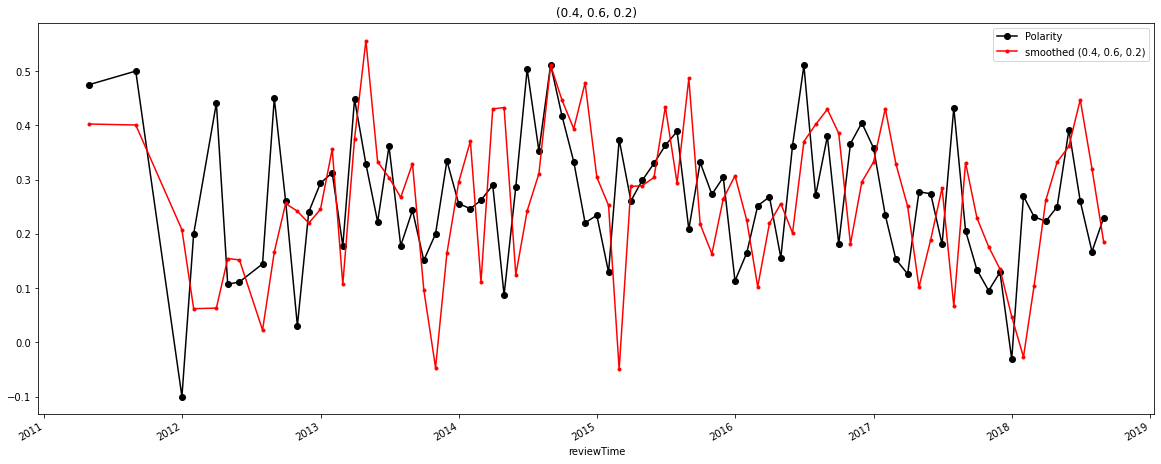

<Figure size 432x288 with 0 Axes>

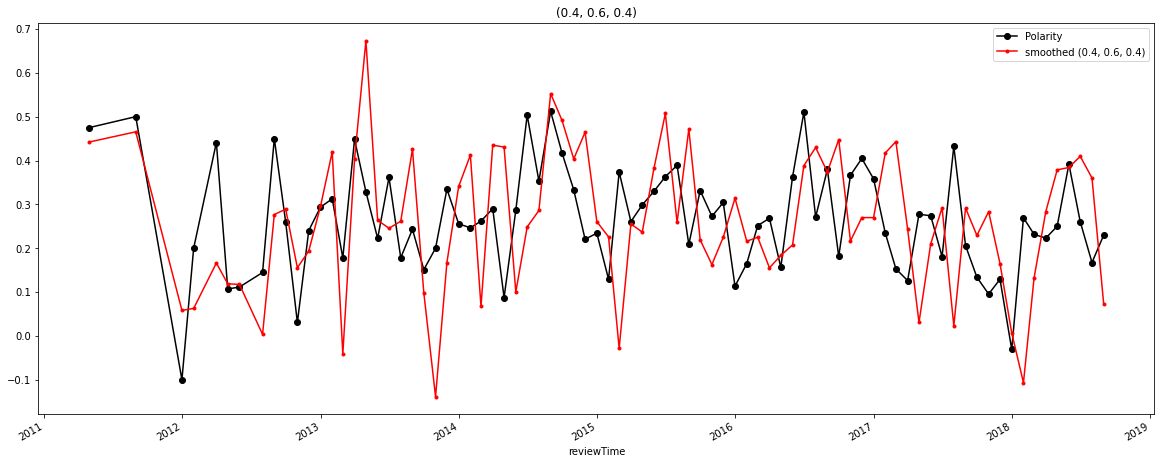

<Figure size 432x288 with 0 Axes>

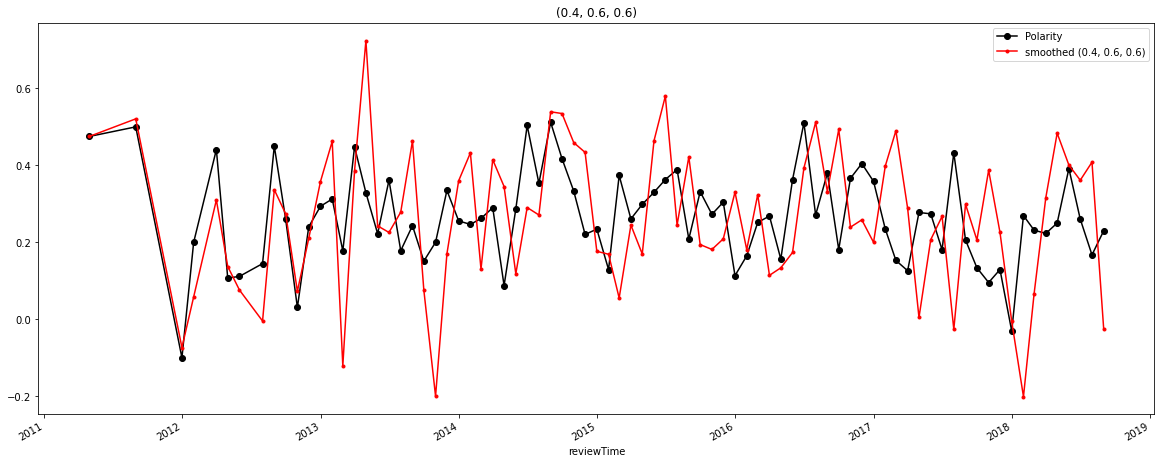

<Figure size 432x288 with 0 Axes>

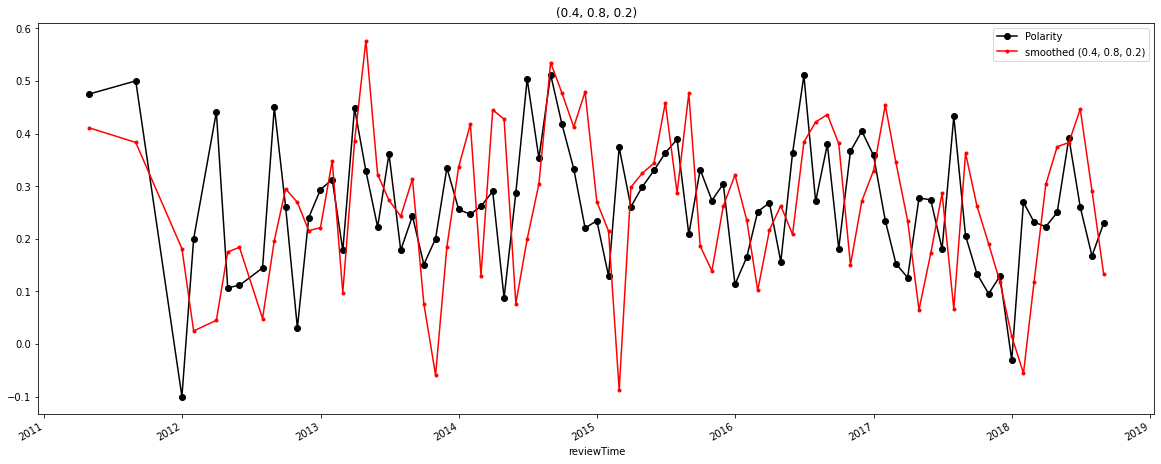

<Figure size 432x288 with 0 Axes>

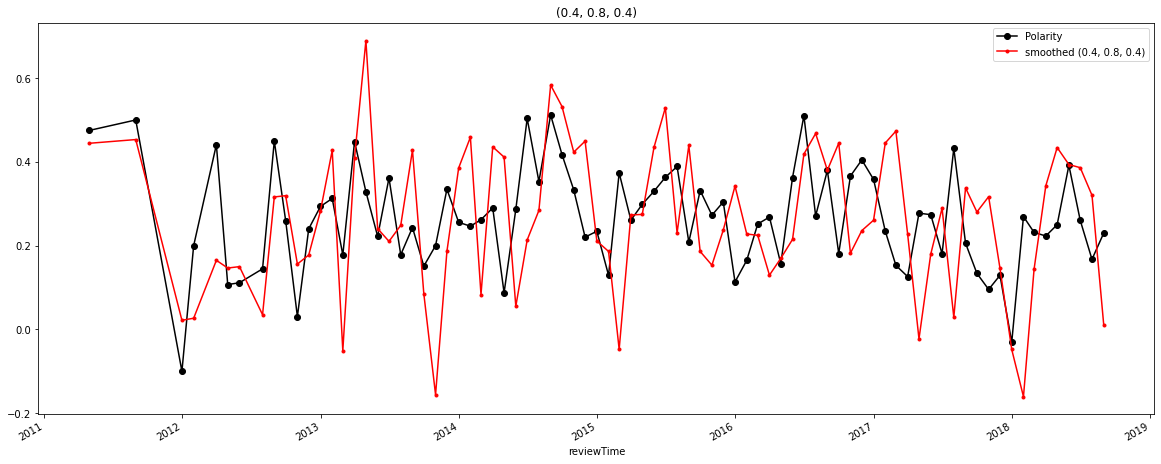

<Figure size 432x288 with 0 Axes>

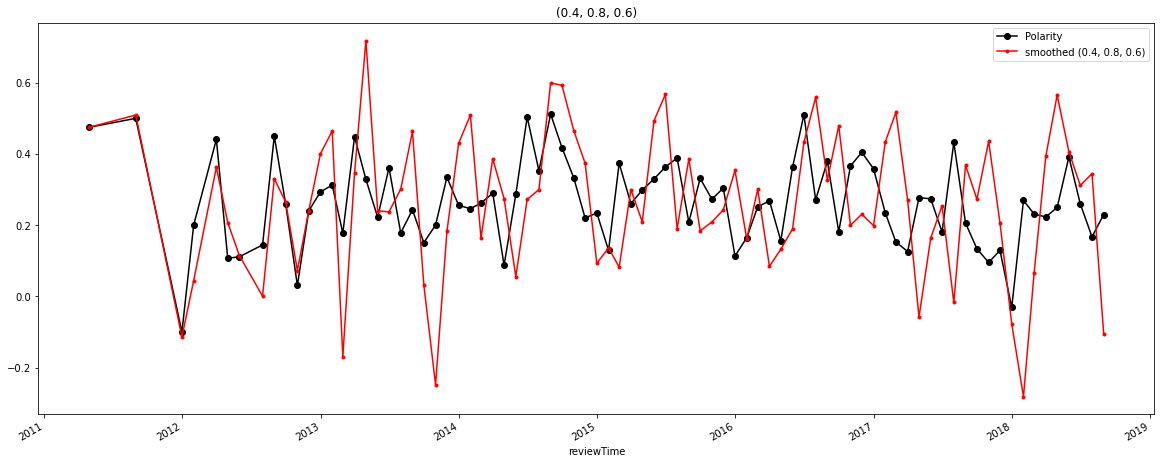

<Figure size 432x288 with 0 Axes>

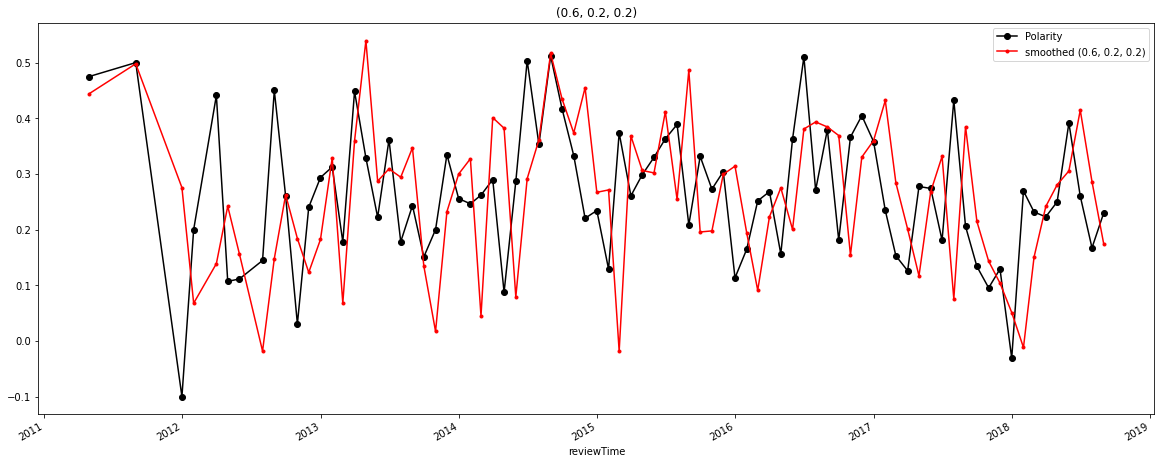

<Figure size 432x288 with 0 Axes>

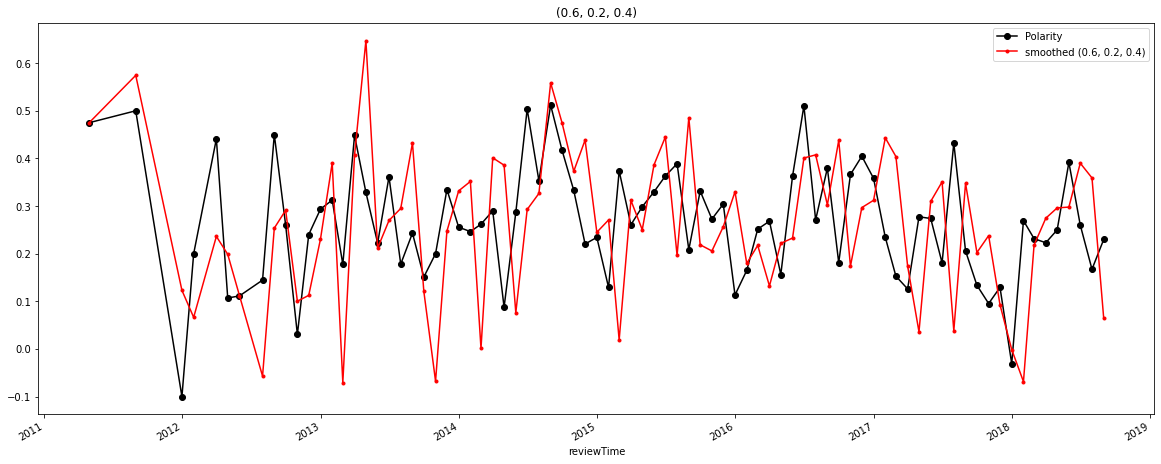

<Figure size 432x288 with 0 Axes>

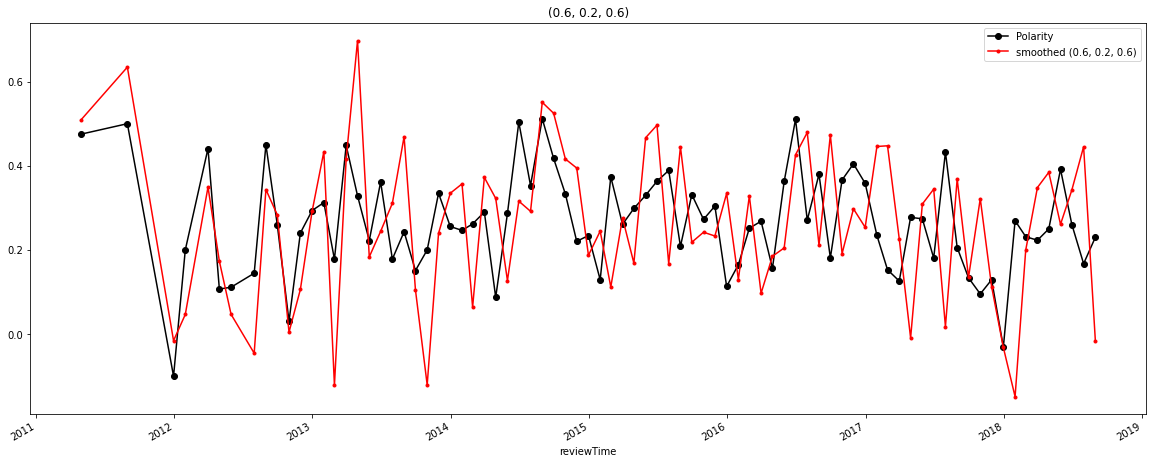

<Figure size 432x288 with 0 Axes>

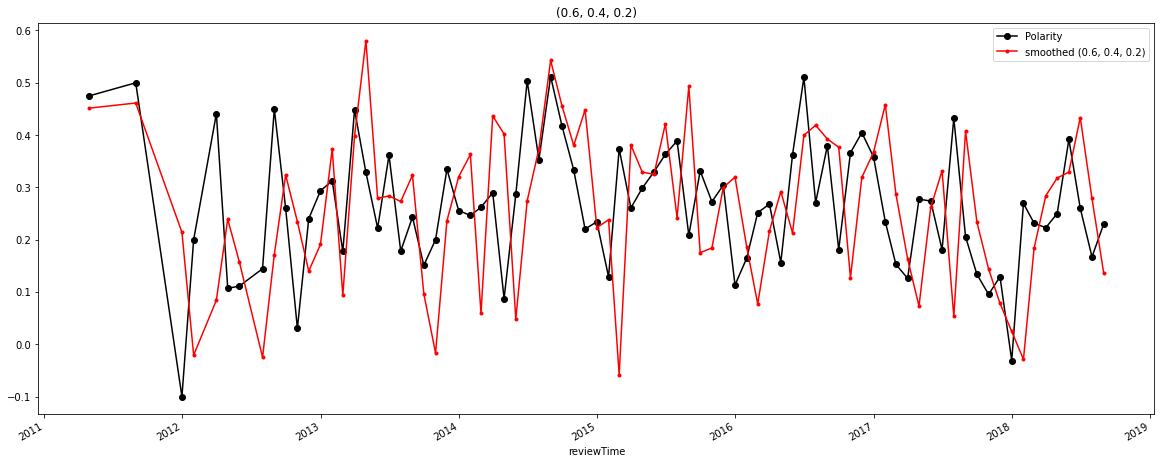

<Figure size 432x288 with 0 Axes>

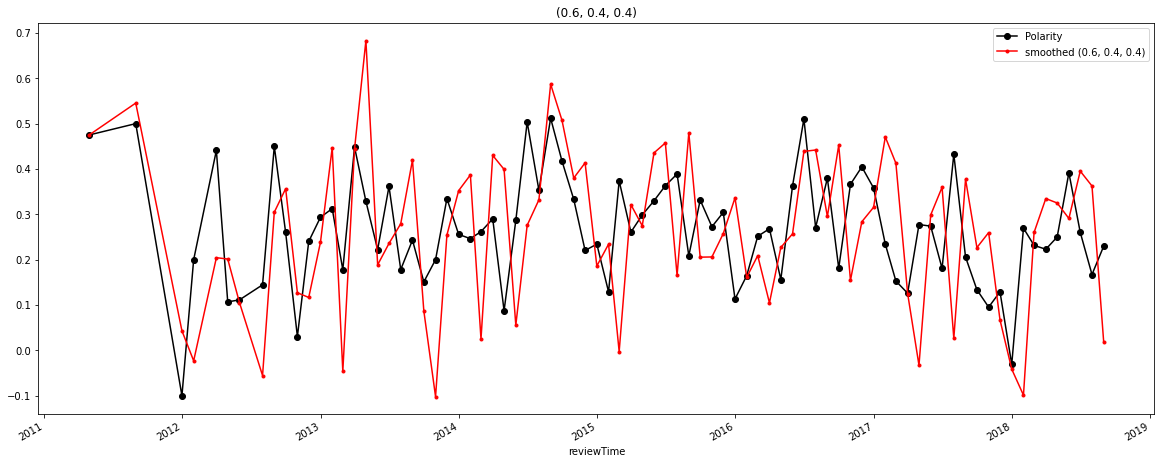

<Figure size 432x288 with 0 Axes>

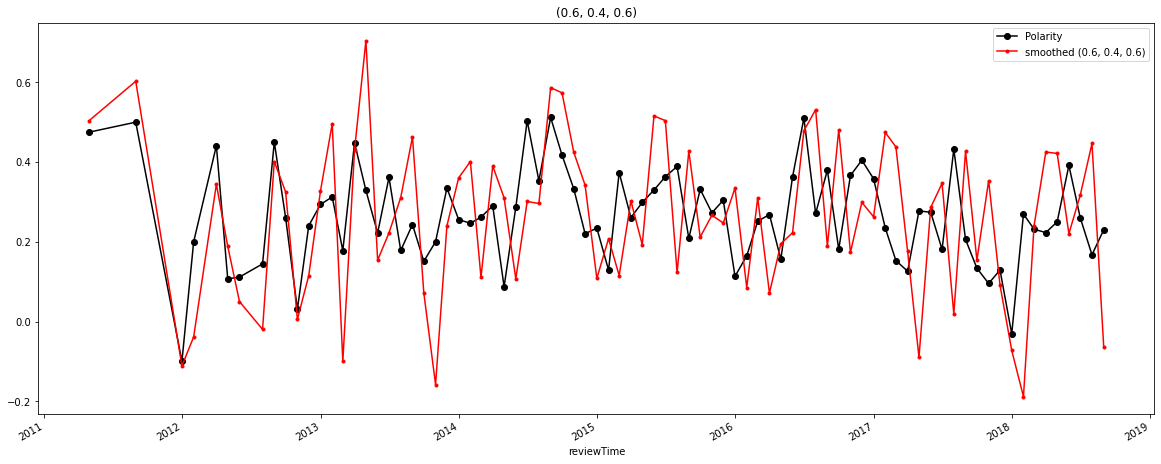

<Figure size 432x288 with 0 Axes>

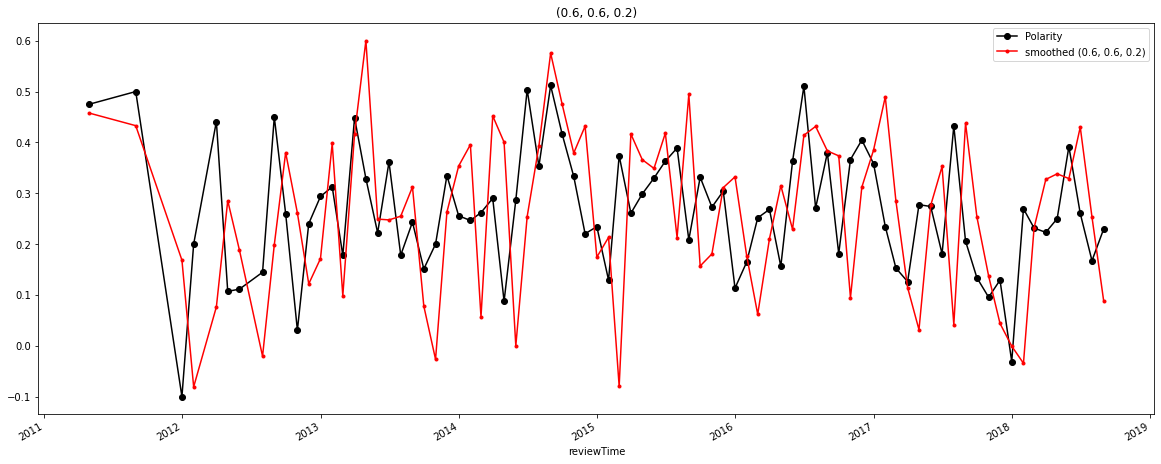

<Figure size 432x288 with 0 Axes>

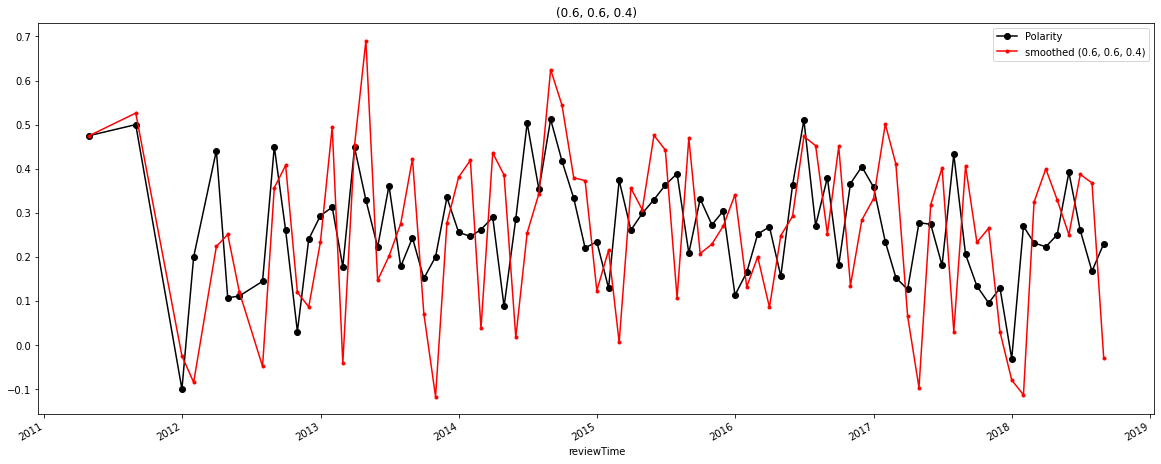

<Figure size 432x288 with 0 Axes>

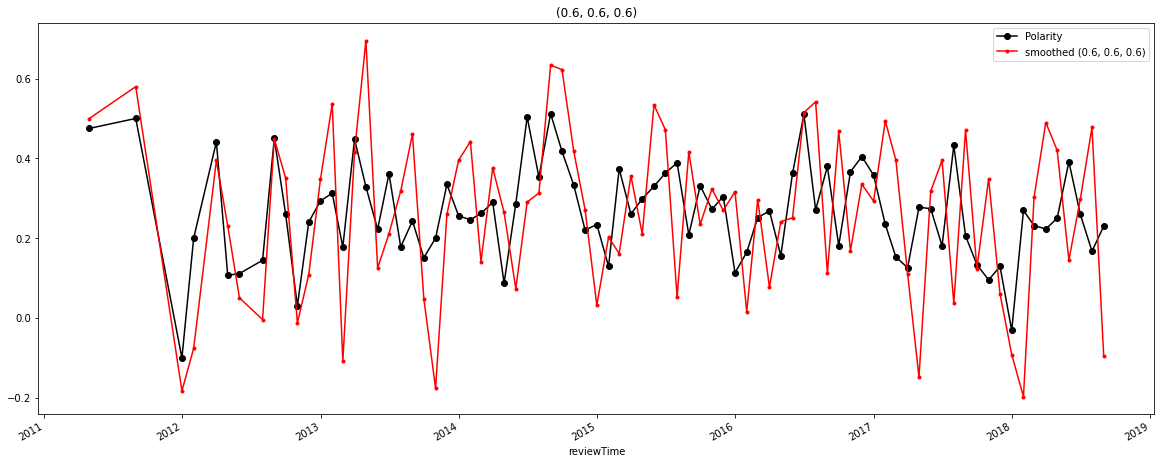

<Figure size 432x288 with 0 Axes>

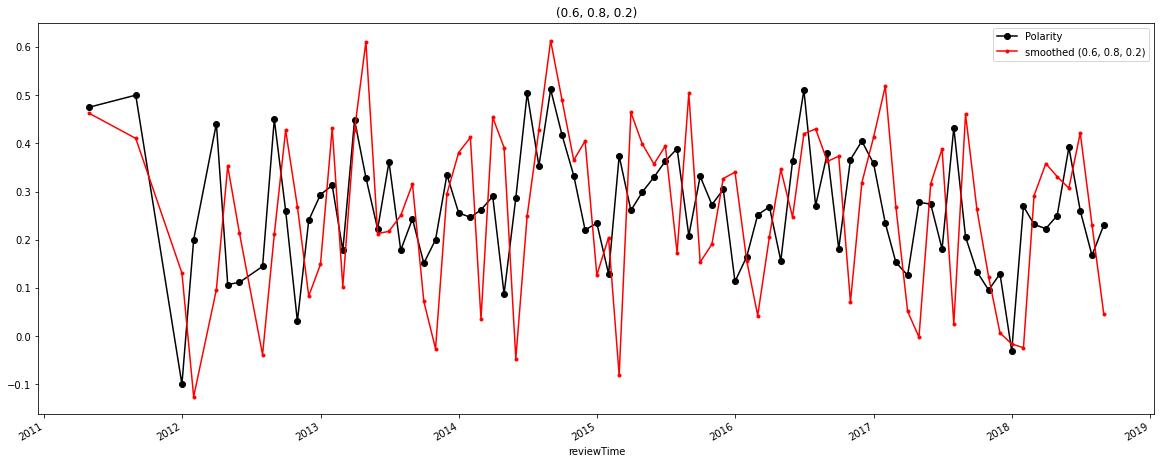

<Figure size 432x288 with 0 Axes>

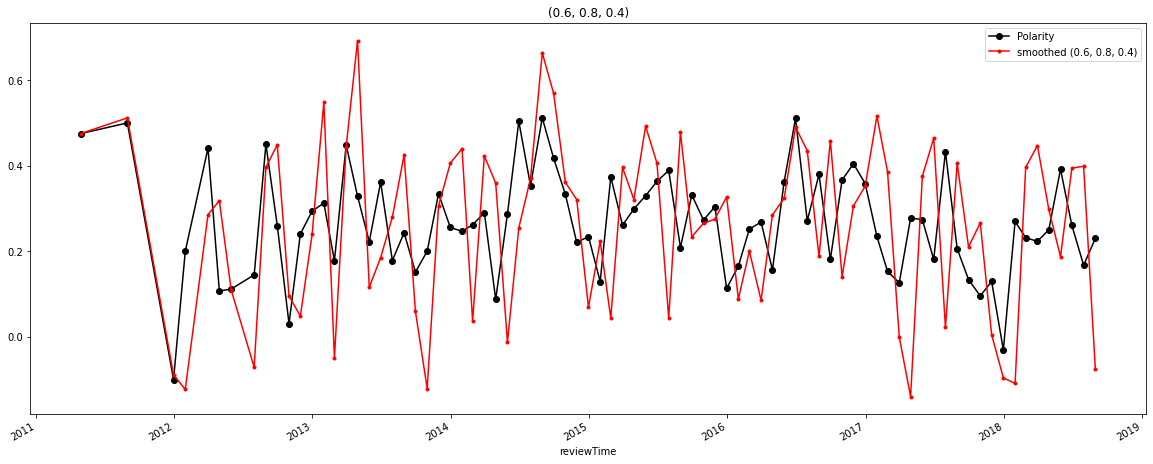

<Figure size 432x288 with 0 Axes>

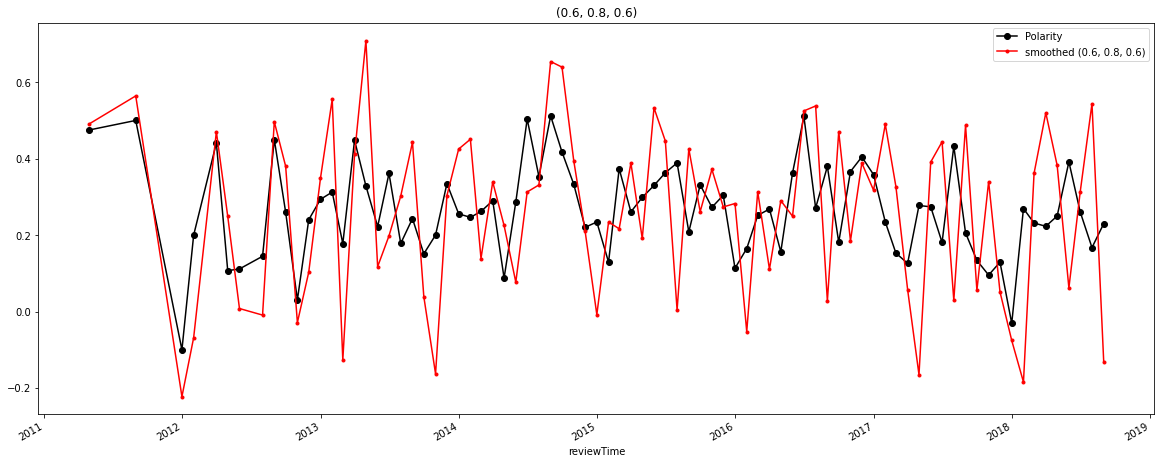

In [ ]:
alphas=[0.2,0.4,0.6]
betas=[0.2,0.4,0.6,0.8]
gammas=[0.2,0.4,0.6]
for a in alphas:
        for b in betas:
            for g in gammas:
                    plt.figure()
                    model3 = ExponentialSmoothing(df3,trend='add',seasonal='add',seasonal_periods = 12).fit(smoothing_level=a,smoothing_trend=b,smoothing_seasonal=g)
                    m_fitted=model3.fittedvalues
                    df3.plot(figsize=(20,8),color='black',marker='o',label='actual')
                    m_fitted.plot(color='red',marker='.',label=f'smoothed {a,b,g}')
                    plt.title(f'{a,b,g}')
                    plt.legend()

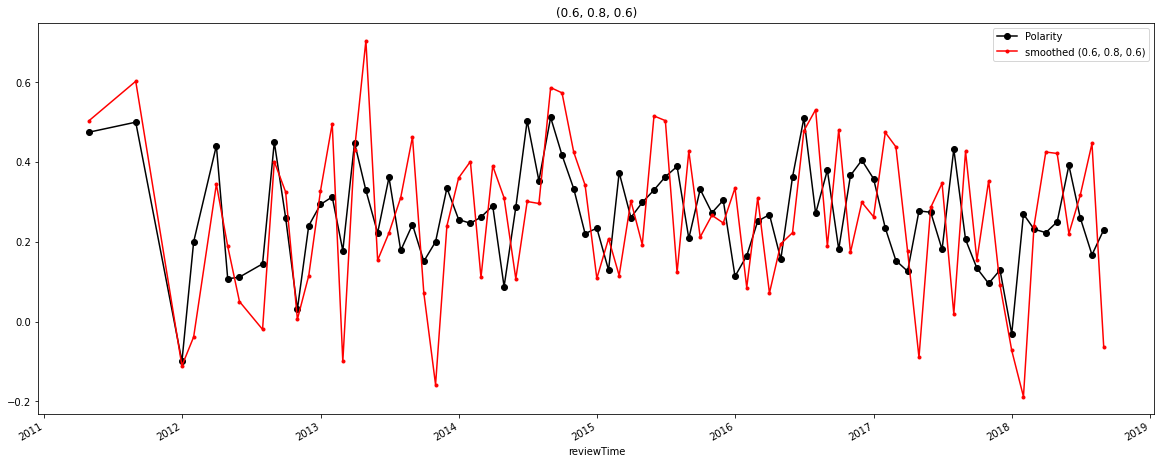

In [ ]:
model3 = ExponentialSmoothing(df3,trend='add',seasonal='add',seasonal_periods = 12).fit(smoothing_level=0.6,smoothing_trend=0.4,smoothing_seasonal=0.6)
m_fitted=model3.fittedvalues
df3.plot(figsize=(20,8),color='black',marker='o',label='actual')
m_fitted.plot(color='red',marker='.',label=f'smoothed {a,b,g}')
plt.title(f'{a,b,g}')
plt.legend()

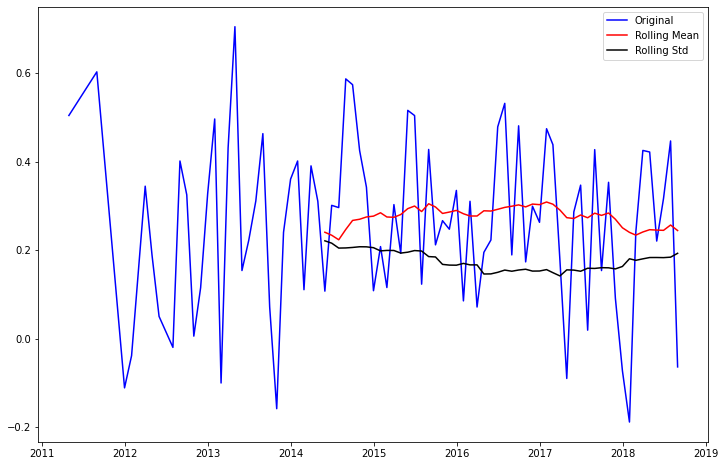

Number of lags :  71


'Data is Stationry 0.01976638960668034'

In [ ]:
stationary(m_fitted)

In [ ]:
def p_and_q(d,l):
  fig,ax=plt.subplots(1,2,figsize=(15,5))
  plot_acf(d,lags=l,ax=ax[0])
  plot_pacf(d,lags=l,ax=ax[1]);

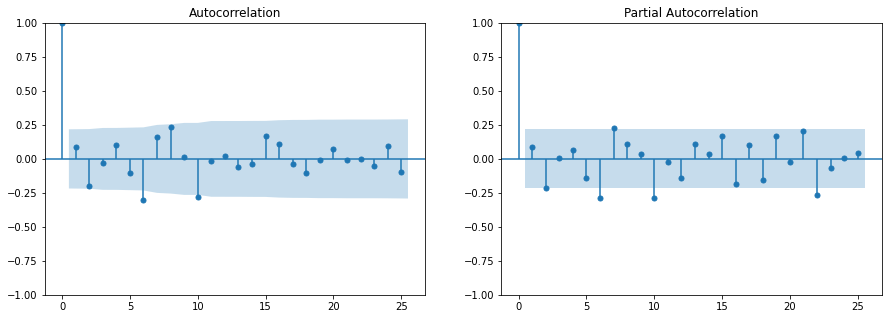

In [ ]:
p_and_q(m_fitted,25)

In [ ]:
ss = int(len(m_fitted)*0.7)
train = m_fitted[:ss]
test= m_fitted[ss:]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima

In [ ]:
#using auto arima model for cross validation
from pmdarima import auto_arima
m2 = auto_arima(m_fitted,start_p=1,max_p=5,start_q=1,max_q=4,d=1,seasonal=False,trace=True)
m2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14.489, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6.982, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12.550, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5.198, Time=0.45 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-12.398, Time=0.46 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-10.720, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-21.525, Time=0.86 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-21.185, Time=0.61 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-8.755, Time=0.18 sec
 ARIMA(5,1,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   81
Model:               SARIMAX(4, 1, 1)   Log Likelihood                  17.762
Date:                Mon, 20 Mar 2023   AIC                            -21.525
Time:                        11:23:27   BIC                             -4.851
Sample:                             0   HQIC                           -14.840
                                 - 81                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.142      0.887      -0.003       0.002
ar.L1          0.1269      0.121      1.052      0.293      -0.109       0.363
ar.L2         -0.1978      0.134     -1.479      0.139      -0.460       0.064
ar.L3          0.0146      0.139      0.105      0.916      -0.258       0.287
ar.L4          0.1322      0.143      0.926      0.354      -0.148       0.412
ma.L1         -0.9860      0.182     -5.431      0.000      -1.342      -0.630
sigma2         0.0361      0.007      4.906      0.000       0.022       0.050
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.85   Prob(JB):                         0.48
Heteroskedasticity (H):               0.98   Skew:                            -0.28
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p=4;d=0;q=4
P=5;D=0;Q=1

sarima_model = sm.tsa.statespace.SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
print(sarima_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   56
Model:             SARIMAX(4, 0, 4)x(5, 0, [1], 12)   Log Likelihood                  20.778
Date:                              Mon, 20 Mar 2023   AIC                            -11.557
Time:                                      11:23:53   BIC                             18.823
Sample:                                           0   HQIC                             0.221
                                               - 56                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2234      1.412     -0.158      0.874      -2.991       2.544
ar.L2          0.01

In [ ]:
#performing Ljung box test

import statsmodels.api as sm

pval = sm.stats.acorr_ljungbox(sarima_model.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pval < 0.05:
  print('Reject H0, bad model')
else:
  print('Accept H0, good model')

Accept H0, good model


In [ ]:
start = len(train)
end = len(train) + len(test) -1
print('start = {}, end = {}'.format(start, end))
pred2 = sarima_model.predict(start, end)
mse2 = mean_squared_error(test,pred2)
print(f'ARIMA MODEL MSE SCORE : {mse2}')

start = 56, end = 80
ARIMA MODEL MSE SCORE : 0.05523252927472206


In [ ]:
m_fitted

reviewTime
2011-04-30    0.504069
2011-08-31    0.602608
2011-12-31   -0.111206
2012-01-31   -0.038527
2012-03-31    0.344360
                ...   
2018-04-30    0.421564
2018-05-31    0.220411
2018-06-30    0.316822
2018-07-31    0.446522
2018-08-31   -0.063866
Length: 81, dtype: float64

In [ ]:
d1=pd.date_range(start='1/04/2011',end='1/09/2020',freq='MS')
forecast = sarima_model.forecast(len(df3)+17)
forecast[57:][0]=0.397086
forecast
forecast.index=d1[10:]

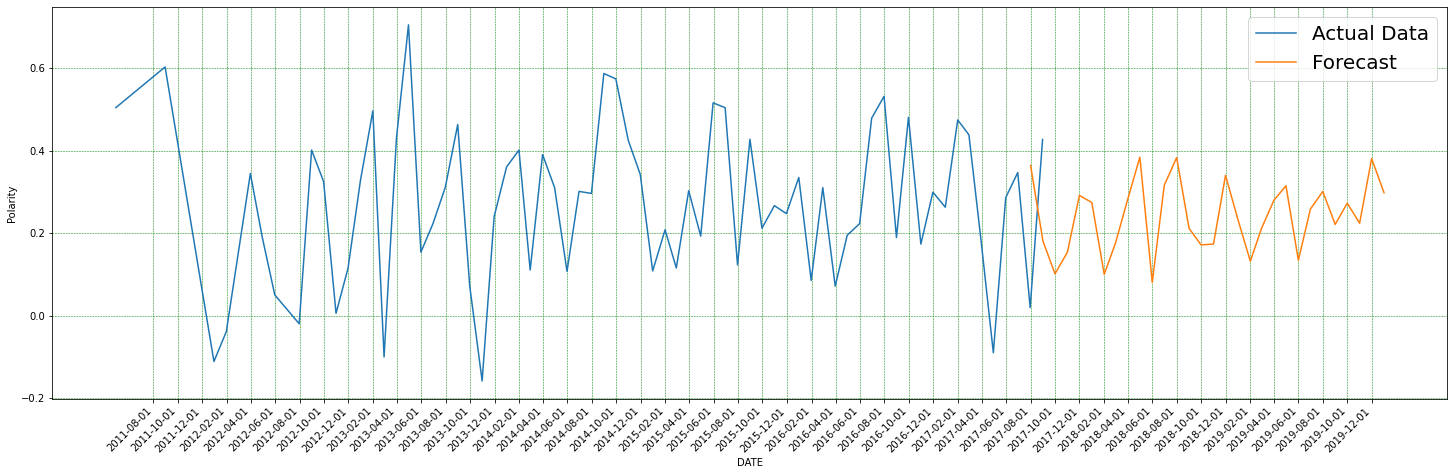

In [ ]:
plt.subplots(figsize=(25,8))
m_fitted[:69].plot(label='Actual Data')
forecast[68:].plot(label='Forecast')
forecast[68:][0]=0.10
plt.xticks(d1[6:][::2],rotation=45)

plt.xlabel("DATE")
plt.ylabel('Polarity')
plt.legend(fontsize='20')
plt.grid(color = 'green',linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
!pip install auto-ts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tscv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.1.0 which is incompatible.


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.2 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.68. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
df3

Polarity
reviewTime          
2011-04-30  0.475000
2011-08-31  0.500000
2011-12-31 -0.100000
2012-01-31  0.200000
2012-03-31  0.441026
...              ...
2018-04-30  0.250000
2018-05-31  0.391667
2018-06-30  0.260227
2018-07-31  0.167361
2018-08-31  0.230000

[81 rows x 1 columns]

In [ ]:
ss = int(len(df3)*0.7)
train = df3.iloc[:ss]
test= df3.iloc[ss:]

## AUTO TIMESERIES

Start of Fit.....
    Target variable given as = overall
Start of loading of data.....
    Inputs: ts_column = reviewTime, sep = ,, target = ['overall']
    Using given input: pandas dataframe...
    train time series reviewTime column is the index on test data...
    train data shape = (56, 1)
Alert: Could not detect strf_time_format of reviewTime. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


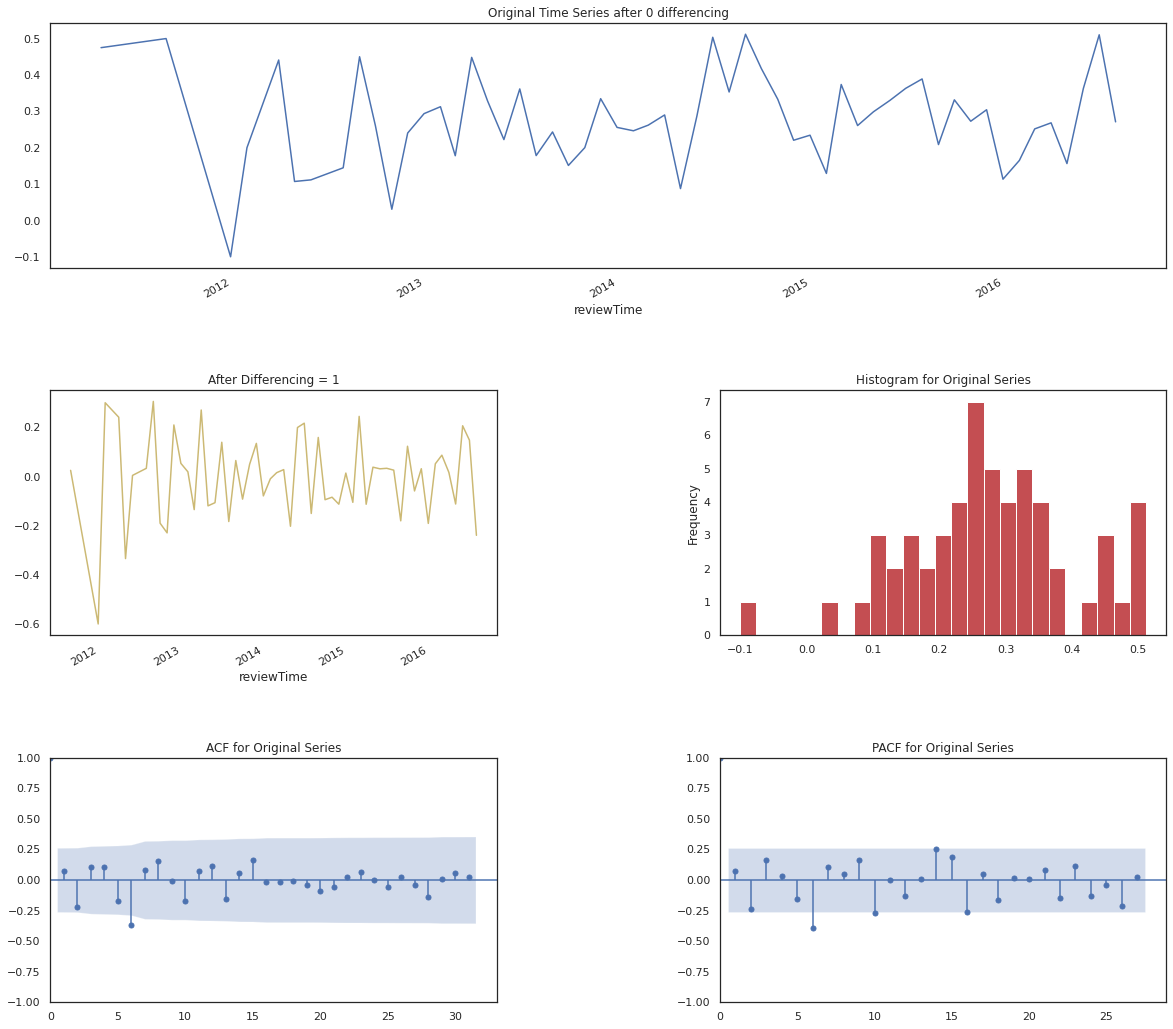

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 31 Test Shape: 5

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14.156, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9.530, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9.191, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-20.772, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-29.783, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-22.934, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-27.997, Time=0.45 sec
 ARIMA(2

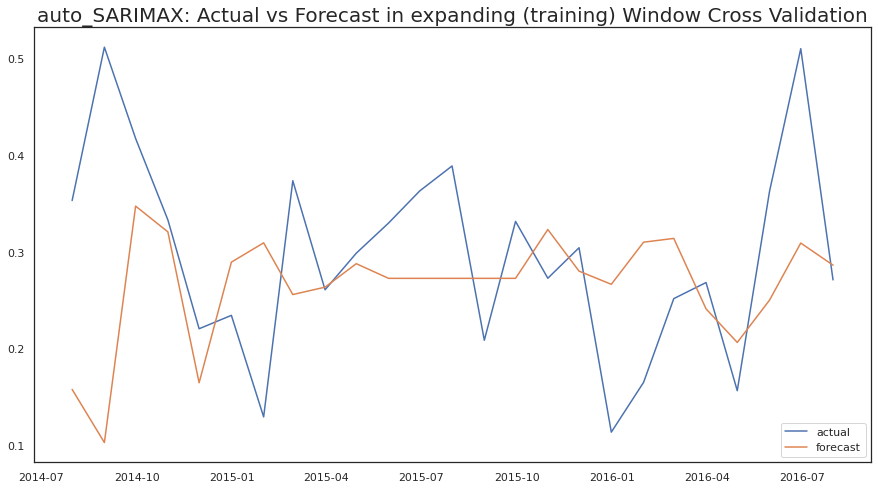

In [ ]:
model = auto_timeseries(score_type='rmse',
                 time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                # model_type=['best'],dask_xgboost_flag=False,
                 verbose=2)
model.fit(traindata= train, 
           ts_column="reviewTime",
           target="overall")

In [ ]:
predictions  = model.predict(test, model='best')
predictions.head()

Predicting using test dataframe as input for auto_SARIMAX model


Polarity      yhat   mean_se  mean_ci_lower  mean_ci_upper
56        0.312914  0.096868       0.123056       0.502772
57        0.270730  0.097138       0.080343       0.461118
58        0.310512  0.097297       0.119813       0.501212
59        0.339607  0.097522       0.148468       0.530745
60        0.305892  0.097578       0.114643       0.497140

In [ ]:
model.get_leaderboard()

name      rmse
0  auto_SARIMAX  0.119006
1           VAR       inf

# CORRELATION BETWEEN TWO DATASET

In [ ]:
grocery.head(2)

Unnamed: 0      reviewerID  reviewTime  overall  verified        asin  \
0           1   ATZQ5B67XZSFK  2017-07-01      4.0      True  B00WN4GHVC   
1           2  A1378UVM0U9PR9  2016-06-03      5.0     False  B0005XP6HO   

                        summary sentiment                category  \
0                    four stars  positive  grocery   gourmet food   
1  when watching my salt intake  positive  grocery   gourmet food   

                                               title              brand  \
0  hoosier hill charms original cereal marshmallo...  hoosier hill farm   
1  mrs dash seasoning  table blend  all natural  ...           mrs dash   

  main_cat  price  len_reviewtext  \
0  grocery  15.99               7   
1  grocery  17.95             775   

                                        norm_reviews  
0                                               good  
1  spice flavor need watch salt intake even somet...

In [ ]:
grocery.columns

Index(['Unnamed: 0', 'reviewerID', 'reviewTime', 'overall', 'verified', 'asin',
       'summary', 'sentiment', 'category', 'title', 'brand', 'main_cat',
       'price', 'len_reviewtext', 'norm_reviews'],
      dtype='object')

In [ ]:
grocery.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
grocery.head(1)

reviewerID  reviewTime  overall  verified        asin     summary  \
0  ATZQ5B67XZSFK  2017-07-01      4.0      True  B00WN4GHVC  four stars   

  sentiment                category  \
0  positive  grocery   gourmet food   

                                               title              brand  \
0  hoosier hill charms original cereal marshmallo...  hoosier hill farm   

  main_cat  price  len_reviewtext norm_reviews  
0  grocery  15.99               7         good

In [ ]:
df_corr.head(2)

description  \
0  sink your sweet tooth into milk duds candya de...   
1  sink your sweet tooth into milk duds candya de...   

                                               title      brand  price  \
0  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   
1  hershey s milk duds candy  5 ounce halloween c...  Milk Duds    5.0   

         asin      reviewerID  reviewTime  overall verified  \
0  B00005BPJO   AOOCITHIUR335  2013-05-16      2.0     True   
1  B00005BPJO  A15MAURFOD3VNU  2013-04-12      1.0     True   

                                          reviewText       summary sentiment  
0  these arrived in a melted blob but i was able ...         stale  negative  
1  i ordered these before and they were find the ...  disappointed  negative

In [ ]:
df_corr.corrwith(grocery,drop=True, method='spearman')

price      0.016628
overall   -0.042870
dtype: float64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_corr.corrwith(grocery,drop=True, method='kendall')

price      0.011533
overall   -0.036145
dtype: float64

In [ ]:
df_corr.corrwith(grocery,drop=True, method='pearson')

price      0.008772
overall   -0.042300
dtype: float64

- The correlation between the values in the Price columns in the two Dataset is 0.016628 which is  positive correlation.

- The correlation between the values in the overall columns in the two Dataset is -0.042870 which is negative correlation.